In [ ]:
https://github.com/A2U8C/Sentiment_Analysis_Flask

In [71]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install fasttext

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
%matplotlib inline
import fasttext
import contractions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [10]:
col_names = ["username", "comments", "commentID","replycount",
             "likecount"]
#readin csv file with seperator(,)
df=pd.read_csv("ytcomments.csv",names=col_names,encoding='utf-8',sep=',',low_memory=False)
print("sample of df",df.head())
print("size of df with rows {0} and columns {1}",df.shape)
print("columns consists of",df.columns)

sample of df                          username  \
0                      Erik Adler   
1               Hannah ParkerKent   
2               Michelle Terrazas   
3                     Jesper Roos   
4  Luis Eduardo Henriquez Miranda   

                                            comments  \
0       This is a Misery Business rip-off. No doubt.   
1                                          U ROCK <3   
2  Love your talents miss Olivia Rodrigo😘🤩Take ca...   
3  Why does it feel like ive heard a similar tune...   
4                                          Paramore?   

                    commentID replycount  likecount  
0  UgzHDGKSzmfYlUDC09l4AaABAg          0          0  
1  Ugz9e6UDiARY3n1kUih4AaABAg          0          0  
2  UgwaOb-cqVi0LKZIyBd4AaABAg          0          0  
3  UgyywYeI6c68fJZhTqp4AaABAg          0          1  
4  UgzMhMmDe1HQh95wXIl4AaABAg          0          0  
size of df with rows {0} and columns {1} (148914, 5)
columns consists of Index(['username', 'comments',

In [11]:
df.shape

(148914, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148914 entries, 0 to 148913
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   username    148902 non-null  object
 1   comments    148914 non-null  object
 2   commentID   148914 non-null  object
 3   replycount  148914 non-null  object
 4   likecount   148914 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 5.7+ MB


In [13]:
df1=df
df1.shape

(148914, 5)

In [14]:
df1.drop(['commentID','replycount','likecount','username'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148914 entries, 0 to 148913
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   comments  148914 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [15]:
#downloading pretrained model from fasttext tocurrent location.
#as lid.176.bin: faster and slightly more accurate but 126MB in size
!wget -O lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2022-01-21 08:04:02--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M  34.9MB/s    in 3.6s    

2022-01-21 08:04:06 (34.9 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



**language detection using fasttext**

In [62]:
#cd /content/drive/My Drive/

In [63]:
#cd Colab Notebooks

In [64]:
#pwd

In [16]:
#we will detect languages and append it in dataframe as we are going to analyse only english language
#https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28

##TextBlob is a common library used to detect string language but it will quickly throw you an error when you are parsing a large amount of text

PRETRAINED_MODEL_PATH = 'lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

languages = []
for sent in df1['comments']:
  #https://stackoverflow.com/questions/65820960/fasttext-error-predict-processes-one-line-at-a-time-remove-n
  sent = sent.replace("\n"," ")
  lang = model.predict(sent)[0]
  languages.append(str(lang)[11:13])
df1['languages'] = languages

In [17]:
df1

,comments,languages
0,This is a Misery Business rip-off. No doubt.,en
1,U ROCK <3,ja
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en
3,Why does it feel like ive heard a similar tune...,en
4,Paramore?,it
...,...,...
148909,AYEE,ja
148910,early,en
148911,omg,nl
148912,NO FUCKING WAY,ja


In [18]:
df1['languages'].value_counts()

en    114500
es      6316
pt      5282
ja      4964
de      2507
       ...  
am         1
bh         1
mg         1
sa         1
rm         1
Name: languages, Length: 126, dtype: int64

In [19]:
df_new=df1[df1['languages']=='en']
df_new

,comments,languages
0,This is a Misery Business rip-off. No doubt.,en
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en
3,Why does it feel like ive heard a similar tune...,en
5,Any BTS army hear?,en
6,This is just a masterpice,en
...,...,...
148895,First,en
148899,Hello,en
148905,This is a Materpiece 💜✨,en
148908,Early,en


**expanding contractions**

In [20]:
df_new['no_contract'] = df_new['comments'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_new.head()

,comments,languages,no_contract
0,This is a Misery Business rip-off. No doubt.,en,"[This, is, a, Misery, Business, rip-off., No, ..."
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,"[Love, your, talents, miss, Olivia, Rodrigo😘🤩T..."
3,Why does it feel like ive heard a similar tune...,en,"[Why, does, it, feel, like, I have, heard, a, ..."
5,Any BTS army hear?,en,"[Any, BTS, army, hear?]"
6,This is just a masterpice,en,"[This, is, just, a, masterpice]"


In [21]:
df_new['rating_description_str'] = [' '.join(map(str, l)) for l in df_new['no_contract']]
df_new.head()

,comments,languages,no_contract,rating_description_str
0,This is a Misery Business rip-off. No doubt.,en,"[This, is, a, Misery, Business, rip-off., No, ...",This is a Misery Business rip-off. No doubt.
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,"[Love, your, talents, miss, Olivia, Rodrigo😘🤩T...",Love your talents miss Olivia Rodrigo😘🤩Take ca...
3,Why does it feel like ive heard a similar tune...,en,"[Why, does, it, feel, like, I have, heard, a, ...",Why does it feel like I have heard a similar t...
5,Any BTS army hear?,en,"[Any, BTS, army, hear?]",Any BTS army hear?
6,This is just a masterpice,en,"[This, is, just, a, masterpice]",This is just a masterpice


Removing emojis

In [22]:
pip install emoji

     |████████████████████████████████| 174 kB 5.1 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170300 sha256=2711bd0ca6fcacf732a4f0380f78825d988ae752b07dd90423d06fd4127778f8
  Stored in directory: /home/mahamadhu97/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [23]:
#https://github.com/Deffro/text-preprocessing-techniques/blob/master/techniques.py

import emoji as emj
#https://stackoverflow.com/questions/63762570/extract-emoji-from-series-of-text



# def extract_emojis(text):s
#     return ''.join(c for c in text if c in emoji.UNICODE_EMOJI)

# df_new['emojis'] = df_new['comments'].apply(extract_emojis)
# df_new

#https://stackoverflow.com/questions/67912641/how-to-extract-emojis-from-text-and-then-add-them-to-a-new-column
%time
EMOJIS = emj.UNICODE_EMOJI["en"]

def extract_emoji(df):
    df_new["emoji"] = ""
    for index, row in df_new.iterrows():
        for emoji in EMOJIS:
            if emoji in row["rating_description_str"]:
                row["rating_description_str"] = row["rating_description_str"].replace(emoji, "")
                row["emoji"] += emoji

extract_emoji(df_new)
#print(df_new.to_string())

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [24]:
df_new.drop(['emoji','no_contract'],axis=1,inplace=True)

In [74]:
#http://cs229.stanford.edu/proj2012/ChakankarVenuturimilliMathur-SentimentAnalysis.pdf

In [25]:
#removed emojis
#https://stackoverflow.com/questions/65109065/python-pandas-remove-emojis-from-dataframe
df_new['rating_description_str']=df_new['rating_description_str'].apply(lambda s: ''.join(filter(lambda c: ord(c) < 256, s)))

In [26]:
 #Converting all tweets to lowercase
def convert_to_lowercase(comments):
  return comments.lower()

df_new['rating_description_str'] = df_new['rating_description_str'].apply(lambda x: convert_to_lowercase(x))

In [27]:
# Removing any urls from tweets
import re
def remove_urls(comments):
 comments = re.sub('(href|http|https)?://(?:[a-zA-Z]|[0–9]|[$-_@.&+#]|[!*\(\),]|’\‘(?:%[0–9a-fA-F][0–9a-fA-F]))+','', comments)
 #comments= re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))',"", comments)
 
 return comments
df_new['clean'] = df_new['rating_description_str'].apply(lambda x: remove_urls(x))

In [28]:
df_new

,comments,languages,rating_description_str,clean
0,This is a Misery Business rip-off. No doubt.,en,this is a misery business rip-off. no doubt.,this is a misery business rip-off. no doubt.
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,love your talents miss olivia rodrigotake care...,love your talents miss olivia rodrigotake care...
3,Why does it feel like ive heard a similar tune...,en,why does it feel like i have heard a similar t...,why does it feel like i have heard a similar t...
5,Any BTS army hear?,en,any bts army hear?,any bts army hear?
6,This is just a masterpice,en,this is just a masterpice,this is just a masterpice
...,...,...,...,...
148895,First,en,first,first
148899,Hello,en,hello,hello
148905,This is a Materpiece 💜✨,en,this is a materpiece,this is a materpiece
148908,Early,en,early,early


In [29]:
#https://stackoverflow.com/questions/3398852/using-python-remove-html-tags-formatting-from-a-string
import re
def striphtml(data):
    data = re.sub(r'<.*?>','',data)
    return data

df_new['clean'] = df_new['clean'].apply(lambda x: striphtml(x))

In [30]:
def remove_space(comments):
  return comments.strip()

df_new['clean'] = df_new['clean'].apply(lambda x: remove_space(x))

In [31]:
#https://medium.com/geekculture/a-tutorial-on-performing-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk-40e5b35ab440

In [32]:
#https://dataaspirant.com/nlp-text-preprocessing-techniques-implementation-python/

In [33]:
import string
# Removing twitter handles, punctuation, extra spaces, numbers and special characters
def remove_noise(data):
  data = re.sub("(@[A-Za-z0–9_]+)","", data)
  data = "".join([char if char not in string.punctuation else " " for char in data])
  data = re.sub(' +',' ', data) 
  data = re.sub("[0–9]+","", data)
  data = re.sub("[^A-Za-z0–9_. ]+","",data)
  return data

df_new['cleaned_comments'] = df_new['clean'].apply(lambda x: remove_noise(x))

In [34]:
df_new

,comments,languages,rating_description_str,clean,cleaned_comments
0,This is a Misery Business rip-off. No doubt.,en,this is a misery business rip-off. no doubt.,this is a misery business rip-off. no doubt.,this is a misery business rip off no doubt
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,love your talents miss olivia rodrigotake care...,love your talents miss olivia rodrigotake care...,love your talents miss olivia rodrigotake care...
3,Why does it feel like ive heard a similar tune...,en,why does it feel like i have heard a similar t...,why does it feel like i have heard a similar t...,why does it feel like i have heard a similar t...
5,Any BTS army hear?,en,any bts army hear?,any bts army hear?,any bts army hear
6,This is just a masterpice,en,this is just a masterpice,this is just a masterpice,this is just a masterpice
...,...,...,...,...,...
148895,First,en,first,first,first
148899,Hello,en,hello,hello,hello
148905,This is a Materpiece 💜✨,en,this is a materpiece,this is a materpiece,this is a materpiece
148908,Early,en,early,early,early


In [35]:
df_new.drop(['rating_description_str','clean'],axis=1,inplace=True)
df_new




,comments,languages,cleaned_comments
0,This is a Misery Business rip-off. No doubt.,en,this is a misery business rip off no doubt
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,love your talents miss olivia rodrigotake care...
3,Why does it feel like ive heard a similar tune...,en,why does it feel like i have heard a similar t...
5,Any BTS army hear?,en,any bts army hear
6,This is just a masterpice,en,this is just a masterpice
...,...,...,...
148895,First,en,first
148899,Hello,en,hello
148905,This is a Materpiece 💜✨,en,this is a materpiece
148908,Early,en,early


In [36]:
#if words are less than one, remove it
#omg abbreviation, y to why
#emo to emotional
#beautyful
#okokkikoooiiiiuueuuu

In [37]:
df_new

,comments,languages,cleaned_comments
0,This is a Misery Business rip-off. No doubt.,en,this is a misery business rip off no doubt
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,love your talents miss olivia rodrigotake care...
3,Why does it feel like ive heard a similar tune...,en,why does it feel like i have heard a similar t...
5,Any BTS army hear?,en,any bts army hear
6,This is just a masterpice,en,this is just a masterpice
...,...,...,...
148895,First,en,first
148899,Hello,en,hello
148905,This is a Materpiece 💜✨,en,this is a materpiece
148908,Early,en,early


In [38]:
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
#https://towardsdatascience.com/a-guide-to-text-classification-and-sentiment-analysis-2ab021796317

#fn to get polarity
#data['comments].apply(lambda x: (TextBlob(x).sentiment.polarity))
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#two cols for above
df_new['subjectivity']= df_new['cleaned_comments'].apply(getsubjectivity)
df_new['polarity']= df_new['cleaned_comments'].apply(getpolarity)

 


In [39]:
def analysis(score):
  if score<0:
    return 'Negative'
  elif score>0:
    return "Positive"
  else:
    return "Neutral"

df_new['analysis']=df_new['polarity'].apply(analysis)

# df_new['target'][df_new.polarity==0]=0
# df_new['target'][df_new.polarity>0]=1
# df_new['target'][df_new.polarity<0]=-1


#data['sentiment'] = data['compound'].apply(lambda score:  'pos' if score >=0.05 else "neg" if score <= -0.05  else 'neut' )


In [40]:
df_new

,comments,languages,cleaned_comments,subjectivity,polarity,analysis
0,This is a Misery Business rip-off. No doubt.,en,this is a misery business rip off no doubt,0.000000,0.00,Neutral
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,love your talents miss olivia rodrigotake care...,0.700000,0.57,Positive
3,Why does it feel like ive heard a similar tune...,en,why does it feel like i have heard a similar t...,0.400000,0.00,Neutral
5,Any BTS army hear?,en,any bts army hear,0.000000,0.00,Neutral
6,This is just a masterpice,en,this is just a masterpice,0.000000,0.00,Neutral
...,...,...,...,...,...,...
148895,First,en,first,0.333333,0.25,Positive
148899,Hello,en,hello,0.000000,0.00,Neutral
148905,This is a Materpiece 💜✨,en,this is a materpiece,0.000000,0.00,Neutral
148908,Early,en,early,0.300000,0.10,Positive


In [41]:
df_new['analysis'].value_counts()

Positive    53017
Neutral     48899
Negative    12584
Name: analysis, dtype: int64

In [42]:
pip install wordcloud

     |████████████████████████████████| 366 kB 4.9 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [44]:
import nltk

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mahamadhu97/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

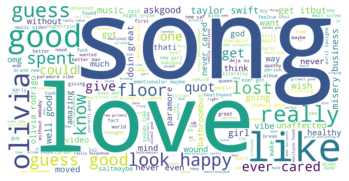

In [96]:
#to analyse stopwords in cloud
#https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6
#Now, we can create some wordclouds to see the most frequently used words in the reviews.
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')
# Create stopword list:
stopwords = set(stopwords)
stopwords.update(["br", "href","ah"])
textt = " ".join(review for review in df_new.cleaned_comments)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',mode="RGB", width=2000 , height=1000).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [97]:
#vader
#https://medium.com/analytics-vidhya/sentiment-analysis-with-vader-label-the-unlabeled-data-8dd785225166

Wordcloud — Positive Sentiment

In [98]:
# split df - positive and negative sentiment:
positive = df_new[df_new['analysis'] == 'Positive']
negative = df_new[df_new['analysis'] == 'Negative']
neutral=df_new[df_new['analysis']== 'Neutral']

In [99]:
positive

,comments,languages,cleaned_comments,subjectivity,polarity,analysis
2,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,love your talents miss olivia rodrigotake care...,0.700000,0.570000,Positive
11,I've always love this song i played it all yea...,en,i have always love this song i played it all y...,0.474339,0.324339,Positive
12,I love it my bird loves it is his favouiout so...,en,i love it my bird loves it is his favouiout song,0.600000,0.500000,Positive
13,I always thought it was: Good 4 u you're happy...,en,i always thought it was good you you are happ...,0.800000,0.750000,Positive
14,Olivia !!!!!!! Please tour in South Africa. Th...,en,olivia please tour in south africa there are s...,0.533333,0.378788,Positive
...,...,...,...,...,...,...
148892,Oh I&#39;m early,en,oh i m early,0.300000,0.100000,Positive
148893,Early,en,early,0.300000,0.100000,Positive
148895,First,en,first,0.333333,0.250000,Positive
148908,Early,en,early,0.300000,0.100000,Positive


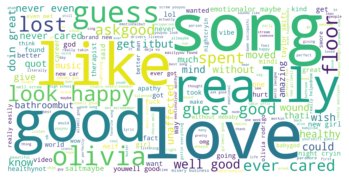

In [100]:
stopwords = set(stopwords)
#stopwords.update(["br", "href"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.cleaned_comments)
#print(pos)
wordcloud2 = WordCloud(stopwords=stopwords,background_color='white',mode="RGB", width=2000 , height=1000).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

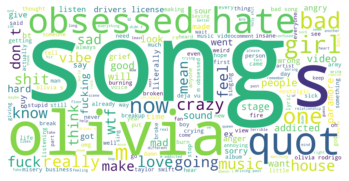

In [101]:
stopwords = set(stopwords)
#stopwords.update(["br", "href"]) 
## good and great removed because they were included in negative sentiment
neg = " ".join(review for review in negative.cleaned_comments)
#print(pos)
wordcloud3 = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

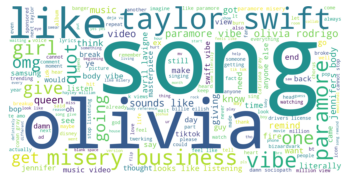

In [102]:
stopwords = set(stopwords)
#stopwords.update(["br", "href"]) 
## good and great removed because they were included in negative sentiment
neu = " ".join(review for review in neutral.cleaned_comments)
#print(pos)
wordcloud4 = WordCloud(stopwords=stopwords,background_color='white',mode="RGB", width=2000 , height=1000).generate(neu)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

The words “good” and “great” initially appeared in the negative sentiment word cloud, despite being positive words. This is probably because they were used in a negative context, such as “not good.” Due to this, I removed those two words from the word cloud.

In [ ]:
# train_tweets['length'] = train_tweets['tweet'].apply(len)
# fig1 = sns.barplot('label','length',data = train_tweets,palette='PRGn')
# plt.title('Average Word Length vs label')
# plot = fig1.get_figure()
# plot.savefig('Barplot.png')

In [46]:
df_new.to_csv (r'cleaned.csv', index = False, header=True)

In [ ]:
***********************************************************

using vader sentiment

In [51]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [52]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/raarthi696/nltk_data...


True

In [53]:
#importing
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating instance
analyser=SentimentIntensityAnalyzer()


In [54]:
df_vader=df_new.copy()

In [55]:
df_vader.drop(['comments','subjectivity','polarity','analysis'],axis=1,inplace=True)

In [56]:
#https://stackoverflow.com/questions/53404847/vader-sentiment-for-each-sentence/53404941#53404941
#calculating sentiment scores
df_vader['vader_neg'] = df_vader['cleaned_comments'].apply(lambda x:analyser.polarity_scores(x)['neg'])
df_vader['vader_neu'] = df_vader['cleaned_comments'].apply(lambda x:analyser.polarity_scores(x)['neu'])
df_vader['vader_pos'] = df_vader['cleaned_comments'].apply(lambda x:analyser.polarity_scores(x)['pos'])
df_vader['vader_compound'] = df_vader['cleaned_comments'].apply(lambda x:analyser.polarity_scores(x)['compound'])

In [57]:
df_vader

,languages,cleaned_comments,vader_neg,vader_neu,vader_pos,vader_compound
0,en,this is a misery business rip off no doubt,0.627,0.373,0.000,-0.8126
2,en,love your talents miss olivia rodrigotake care...,0.025,0.604,0.372,0.9732
3,en,why does it feel like i have heard a similar t...,0.000,0.783,0.217,0.3612
5,en,any bts army hear,0.000,1.000,0.000,0.0000
6,en,this is just a masterpice,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
148895,en,first,0.000,1.000,0.000,0.0000
148899,en,hello,0.000,1.000,0.000,0.0000
148905,en,this is a materpiece,0.000,1.000,0.000,0.0000
148908,en,early,0.000,1.000,0.000,0.0000


In [65]:
df_vader.to_csv (r'nltkcleaned.csv', index = False, header=True)

NameError: name 'df_vader' is not defined

In [66]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)


data['sentiment'] = data['compound'].apply(lambda score:  'pos' if score >=0.05 else "neg" if score <= -0.05  else 'neut' )


NameError: name 'data' is not defined

In [ ]:
****************************************************************************************

Feature Egineering

df with tfidf

df with tfidfw2v

df with tfidf w2v top features

df with 

In [47]:
df_new=pd.read_csv('cleaned.csv')
df_new

,comments,languages,cleaned_comments,subjectivity,polarity,analysis
0,This is a Misery Business rip-off. No doubt.,en,this is a misery business rip off no doubt,0.000000,0.00,Neutral
1,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,love your talents miss olivia rodrigotake care...,0.700000,0.57,Positive
2,Why does it feel like ive heard a similar tune...,en,why does it feel like i have heard a similar t...,0.400000,0.00,Neutral
3,Any BTS army hear?,en,any bts army hear,0.000000,0.00,Neutral
4,This is just a masterpice,en,this is just a masterpice,0.000000,0.00,Neutral
...,...,...,...,...,...,...
114495,First,en,first,0.333333,0.25,Positive
114496,Hello,en,hello,0.000000,0.00,Neutral
114497,This is a Materpiece 💜✨,en,this is a materpiece,0.000000,0.00,Neutral
114498,Early,en,early,0.300000,0.10,Positive


In [48]:
def custom_encoder(df):
    df.replace(to_replace ="Positive", value =2, inplace=True)
    df.replace(to_replace ="Negative", value =1, inplace=True)
    df.replace(to_replace ="Neutral", value =0, inplace=True)
    

In [49]:
custom_encoder(df_new['analysis'])

In [50]:
df_new.to_csv (r'processedcomments.csv', index = False, header=True)

In [3]:
df_new=pd.read_csv("processedcomments.csv")
df_new.head(2)

,comments,languages,cleaned_comments,subjectivity,polarity,analysis
0,This is a Misery Business rip-off. No doubt.,en,this is a misery business rip off no doubt,0.0,0.00,0
1,Love your talents miss Olivia Rodrigo😘🤩Take ca...,en,love your talents miss olivia rodrigotake care...,0.7,0.57,2


In [4]:
df_new.isnull().any()

comments            False
languages           False
cleaned_comments     True
subjectivity        False
polarity            False
analysis            False
dtype: bool

In [5]:
df_new.cleaned_comments.fillna(' ',inplace=True)

In [6]:
df_new.isnull().any()

comments            False
languages           False
cleaned_comments    False
subjectivity        False
polarity            False
analysis            False
dtype: bool

In [7]:
df_new['analysis'].value_counts()

2    53017
0    48899
1    12584
Name: analysis, dtype: int64

In [8]:
y=df_new['analysis'].values
x=df_new['cleaned_comments'].values

In [9]:
df_new['analysis'].value_counts()

2    53017
0    48899
1    12584
Name: analysis, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

#Split dataset into train and test
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,stratify=y)




In [84]:
#Split dataset into train and test
#X_train,X_cv,Y_train,Y_cv=train_test_split(X_trains,Y_trains,test_size=0.33,stratify=Y_trains)

In [11]:
print("Shape of X_train",X_train.shape)
#print("shape of X_cv",X_cv.shape)
print("shape of X_test",X_test.shape)

Shape of X_train (76715,)
shape of X_test (37785,)


In [12]:
train_distr = Counter(Y_train)
print(train_distr)

Counter({2: 35522, 0: 32762, 1: 8431})


In [13]:
test_distr = Counter(Y_test)
print(test_distr)

Counter({2: 17495, 0: 16137, 1: 4153})


In [39]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(Y_train)
train_len = len(Y_train)
print("Positive: ",int(train_distr[2])/train_len,"Neutral: ", int(train_distr[0])/train_len,
     "Negative: ", int(train_distr[1])/train_len)



print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(Y_test)
test_len = len(Y_test)
print("Positive: ",int(test_distr[2])/test_len,"Neutral: ", int(test_distr[0])/test_len,
     "Negative: ", int(test_distr[1])/test_len)
#print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Positive:  0.4630385191944209 Neutral:  0.4270612005474809 Negative:  0.10990028025809816
---------- Distribution of output variable in test data ----------
Positive:  0.4630144237131137 Neutral:  0.42707423580786025 Negative:  0.10991134047902607


https://www.semanticscholar.org/paper/Sentiment-Analysis-Model-Based-on-Youtube-Comment-Tanesab/e7c73a374d3a31898e174693a99bb1d30d98b4a2#paper-header

https://github.com/ricklamers/twitter-sentiment-flask-python/blob/master/main.py  
    
https://www.researchgate.net/publication/344059311_Sentiment_Analysis_of_the_Body-Shaming_Beauty_Vlog_Comments
    
data['sentiment'] = data['compound'].apply(lambda score:  'pos' if score >=0.05 else "neg" if score <= -0.05  else 'neut' )


https://medium.com/analytics-vidhya/how-to-select-performance-metrics-for-classification-models-c847fe6b1ea3

    https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
    

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

BOW on df_new

In [90]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

bow_train = count_vect.transform(X_train)
print("the type of count vectorizer ",type(bow_train))
print("the shape of out text BOW vectorizer ",bow_train.get_shape())
print("the number of unique words ", bow_train.get_shape()[1])


bow_test = count_vect.transform(X_test)
print("the type of count vectorizer ",type(bow_test))
print("the shape of out text BOW vectorizer ",bow_test.get_shape())
print("the number of unique words ", bow_test.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (76715, 24974)
the number of unique words  24974
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (37785, 24974)
the number of unique words  24974


ngrams

In [91]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_train = count_vect.fit_transform(X_train)
#final_bigram_cv = count_vect.fit_transform(X_cv)
final_bigram_test = count_vect.fit_transform(X_test)
print("the type of count vectorizer ",type(final_bigram_train))
print("the shape of out text BOW vectorizer ",final_bigram_train.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_train.get_shape()[1])


print("the type of count vectorizer ",type(final_bigram_test))
print("the shape of out text BOW vectorizer ",final_bigram_test.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_test.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (76715, 5000)
the number of unique words including both unigrams and bigrams  5000
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (37785, 5000)
the number of unique words including both unigrams and bigrams  5000


In [92]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,4), min_df=10, max_features=5000)
final_4gram_train = count_vect.fit_transform(X_train)
#final_4gram_cv = count_vect.fit_transform(X_cv)
final_4gram_test = count_vect.fit_transform(X_test)
print("the type of count vectorizer ",type(final_4gram_train))
print("the shape of out text BOW vectorizer ",final_4gram_train.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_4gram_train.get_shape()[1])



print("the type of count vectorizer ",type(final_4gram_test))
print("the shape of out text BOW vectorizer ",final_4gram_test.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_4gram_test.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (76715, 5000)
the number of unique words including both unigrams and bigrams  5000
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (37785, 5000)
the number of unique words including both unigrams and bigrams  5000


TFIDF

In [71]:
#tokenise,count tokens,transform raw counts to tfidf values(transfomr s collections of raw docs to matrix of tfidf features)
from sklearn.feature_extraction.text import TfidfVectorizer
#ignores term that appears in less than 10% of docs
vect1=TfidfVectorizer(min_df=12)
#learning the vocab of traindata
vect1.fit(X_train)


TfidfVectorizer(min_df=12)

In [68]:
import pickle
pickle.dump(vect1, open('vectorizer.pkl','wb'))

In [72]:
#transforming into columns
X_train_vector1=vect1.transform(X_train)
#X_cv_vector1=vect1.transform(X_cv)
X_test_vector1=vect1.transform(X_test)

In [73]:
print("after tFIDF vectorisation")
print("-"*25)
print(X_train_vector1.shape,Y_train.shape)
#print(X_cv_vector1.shape,Y_cv.shape)
print(X_test_vector1.shape,Y_test.shape)
print("-"*25)

after tFIDF vectorisation
-------------------------
(76715, 2913) (76715,)
(37785, 2913) (37785,)
-------------------------


avg w2vec

TFIDFW2V

In [97]:
import pickle
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [98]:
tfidfmodel = TfidfVectorizer()
tfidfmodel.fit(X_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidfmodel.get_feature_names(), list(tfidfmodel.idf_)))
#tfidfwords=set(model.get_feature_names())
# TF-IDF weighted Word2Vec
tfidf_feat = set(tfidfmodel.get_feature_names()) # tfidf words/col-names

In [99]:
from tqdm import tqdm

# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
#row=0;
for sent in tqdm(X_train): # for each review/sentence 
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(): # for each word in a review/sentence
        if word in glove_words and word in tfidf_feat:
            vec=model[word]
            
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent.split()))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    #row += 1

100%|██████████| 76715/76715 [00:10<00:00, 7185.58it/s]


In [100]:
print(len(tfidf_sent_vectors))
print(len(tfidf_sent_vectors[0]))
print(type(tfidf_sent_vectors))

76715
300
<class 'list'>


In [101]:
tfidfmodel = TfidfVectorizer()
tfidfmodel.fit(X_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidfmodel.get_feature_names(), list(tfidfmodel.idf_)))
#tfidfwords=set(model.get_feature_names())
# TF-IDF weighted Word2Vec
tfidf_feat = set(tfidfmodel.get_feature_names()) # tfidf words/col-names

In [102]:
from tqdm import tqdm

# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
#row=0;
for sent in tqdm(X_test): # for each review/sentence 
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(): # for each word in a review/sentence
        if word in glove_words and word in tfidf_feat:
            vec=model[word]
            
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent.split()))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    #row += 1

100%|██████████| 37785/37785 [00:05<00:00, 7283.51it/s]


In [103]:
print(len(tfidf_sent_vectors_test))
print(len(tfidf_sent_vectors_test[0]))
print(type(tfidf_sent_vectors_test))

37785
300
<class 'list'>


In [104]:
np.isnan(Y_test)

array([False, False, False, ..., False, False, False])

Models

In [36]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("C",C.shape)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    #plt.figure(figsize=(20,4))
    
    labels = [0,1,2]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [37]:
Y_test

array([0, 2, 2, ..., 0, 2, 2])

Log loss on Test Data using Random Model 1.3381481539762714
C (3, 3)
-------------------- Confusion matrix --------------------


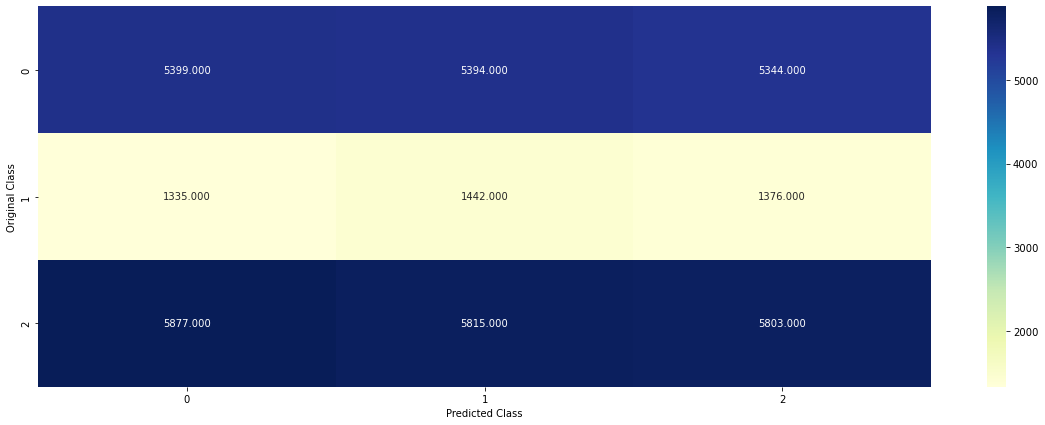

-------------------- Precision matrix (Columm Sum=1) --------------------


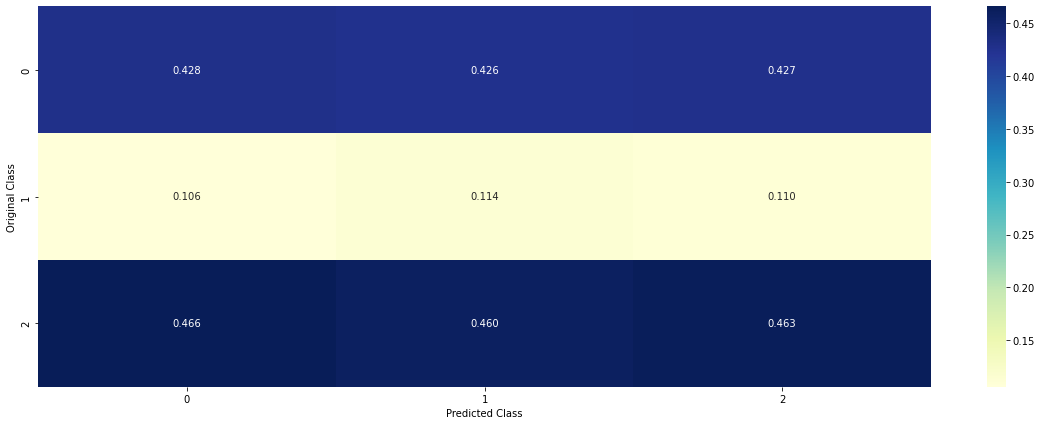

-------------------- Recall matrix (Row sum=1) --------------------


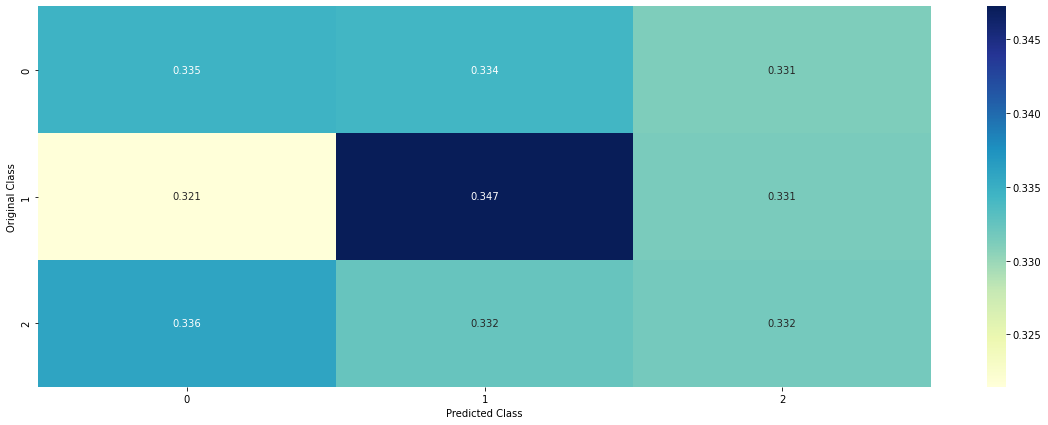

In [40]:
predicted_y = np.zeros((test_len,3))

for i in range(test_len):
    #print(i)
    rand_probs = np.random.rand(1,3)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(Y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y,axis=1)
plot_confusion_matrix(Y_test, predicted_y)

 Building a random model (Finding worst-case log-loss)

37785
Log loss on Test Data using Random Model 1.3363956363349525
C (3, 3)
-------------------- Confusion matrix --------------------


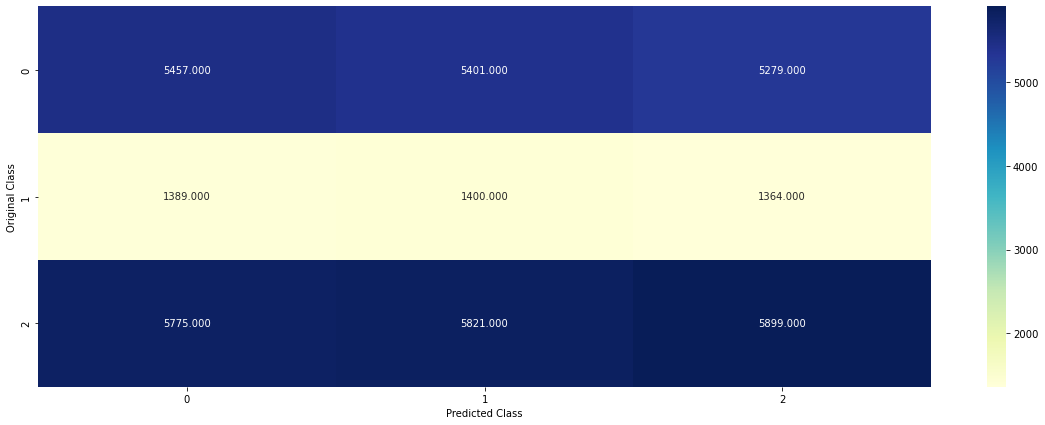

-------------------- Precision matrix (Columm Sum=1) --------------------


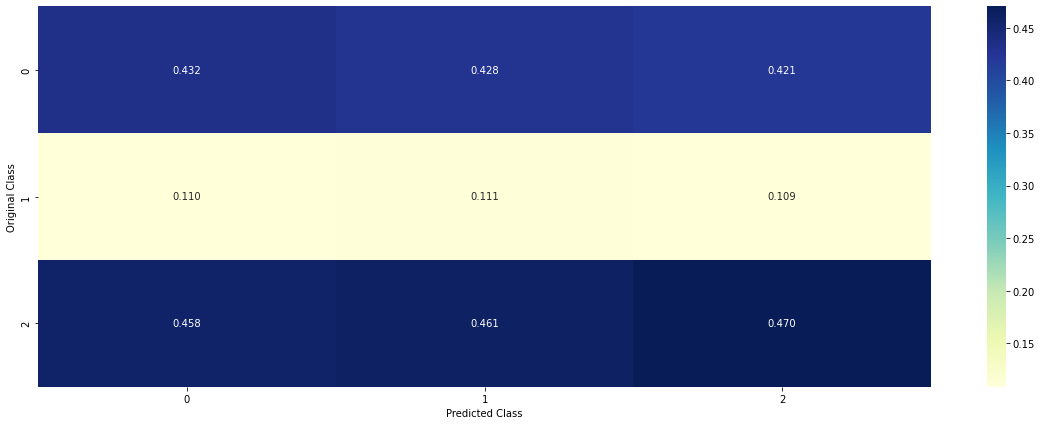

-------------------- Recall matrix (Row sum=1) --------------------


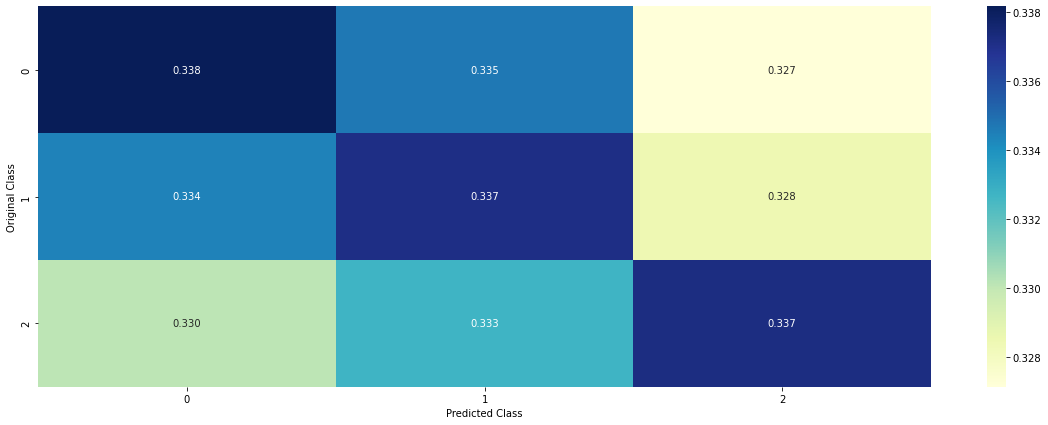

In [141]:
test_data_len = Y_test.shape[0]
print(test_data_len)
#cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
#cv_predicted_y = np.zeros((cv_data_len,9))
#for i in range(cv_data_len):
#    rand_probs = np.random.rand(1,9)
#    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
#print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,3))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,3)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(Y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(Y_test, predicted_y)

Logistic Regression with hyperparameter tuning  on BOW

In [148]:
X_train

array(['okay but olivia is going to be an icon of our generation ', ' ',
       'the entire visuals of the video are huuugely influenced by jennifers body and i am h e r e for it',
       ...,
       'i didn  t like this clip i like the song but the lyrics don  t match that in the video at all the girl wrote a song that after parting he immediately found another girl she could not forget the past relationship none of this is shown in the video ',
       'amazing olivia you  re such a queen love you',
       'does she really write all songs for me or does she really feel the same as meeeeeeee'],
      dtype=object)

For values of alpha =  1e-05 The log loss is: 0.3923988199792719
For values of alpha =  0.0001 The log loss is: 0.36885392120095134
For values of alpha =  0.001 The log loss is: 0.4374808408738375
For values of alpha =  0.01 The log loss is: 0.6607788606806612
For values of alpha =  0.1 The log loss is: 0.7986818749976512
For values of alpha =  1 The log loss is: 0.8624064636592568
For values of alpha =  10 The log loss is: 0.8822742368660721


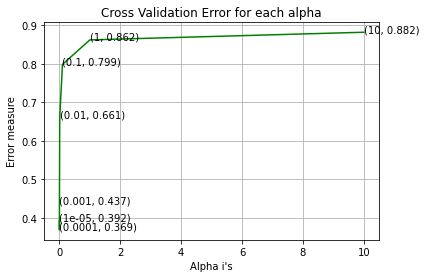

In [31]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(bow_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(bow_train, Y_train)
    predict_y = sig_clf.predict_proba(bow_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



For values of best alpha =  0.0001 The train log loss is: 0.352581046026103
For values of best alpha =  0.0001 The test log loss is: 0.36885392120095134
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


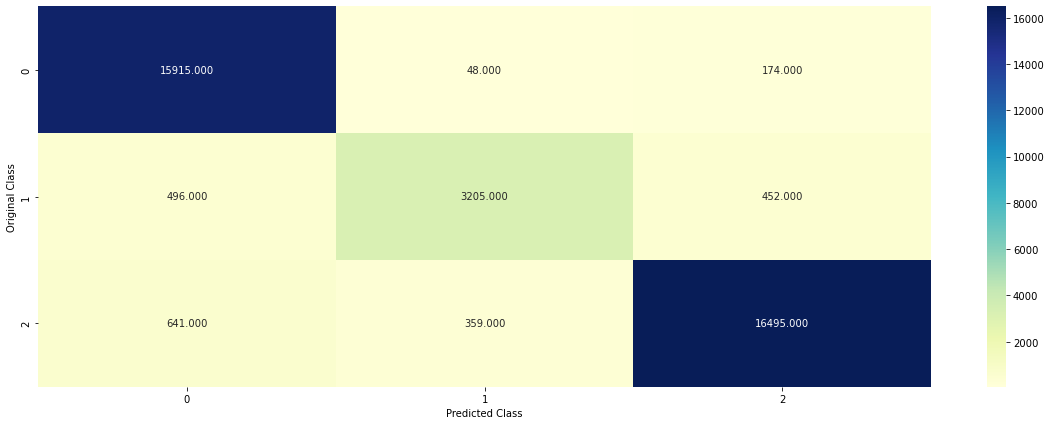

-------------------- Precision matrix (Columm Sum=1) --------------------


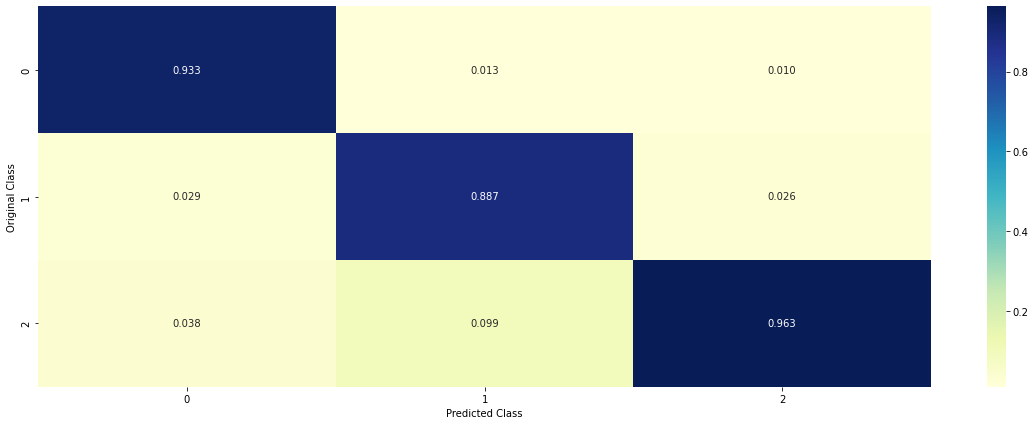

-------------------- Recall matrix (Row sum=1) --------------------


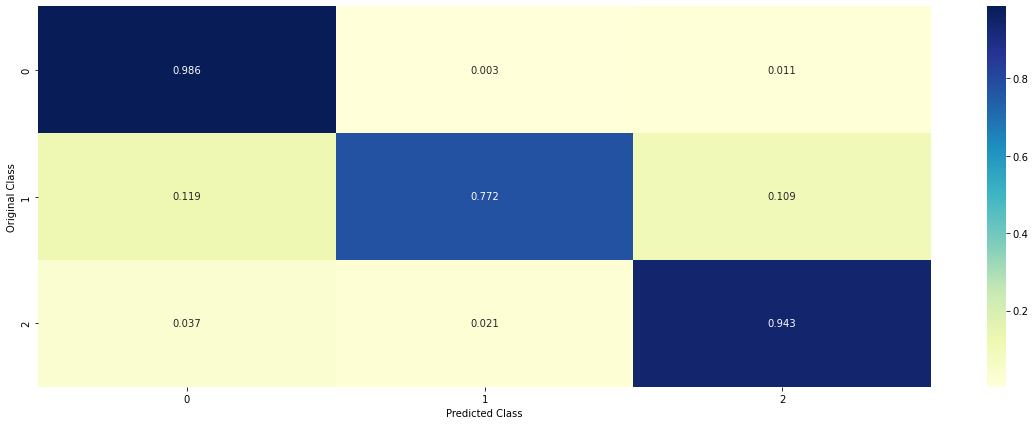

In [32]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(bow_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(bow_train, Y_train)

predict_y = sig_clf.predict_proba(bow_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(bow_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

*LR on 4gram*

For values of alpha =  1e-05 The log loss is: 1.085209379442938
For values of alpha =  0.0001 The log loss is: 1.0948955798570097
For values of alpha =  0.001 The log loss is: 0.9627924644998664
For values of alpha =  0.01 The log loss is: 0.9229279184181634
For values of alpha =  0.1 The log loss is: 0.9612519829381264
For values of alpha =  1 The log loss is: 0.9682266227654414
For values of alpha =  10 The log loss is: 0.9594251100343056


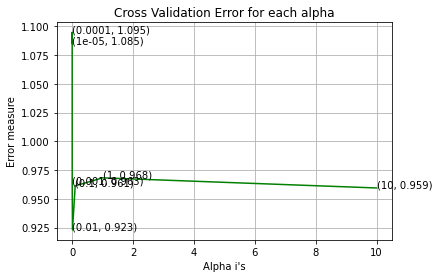

In [33]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(final_4gram_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(final_4gram_train, Y_train)
    predict_y = sig_clf.predict_proba(final_4gram_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



For values of best alpha =  0.01 The train log loss is: 0.6385748674441605
For values of best alpha =  0.01 The test log loss is: 0.9229279184181634
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


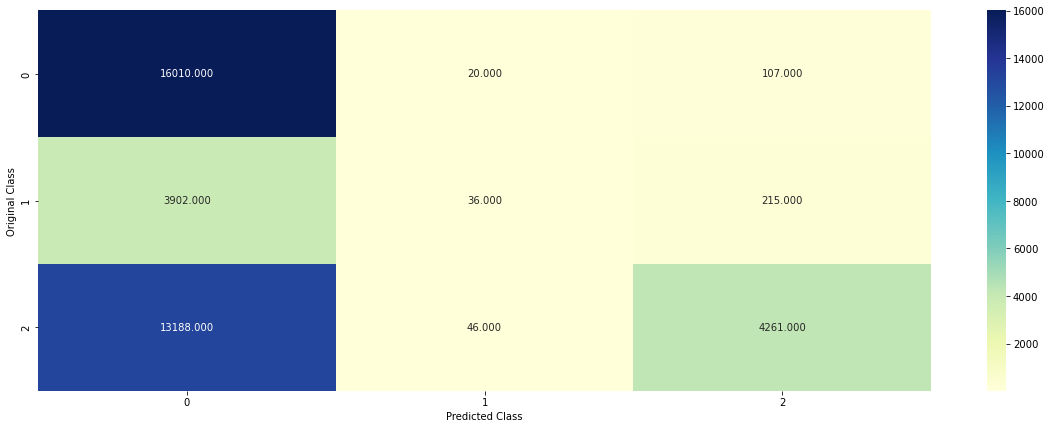

-------------------- Precision matrix (Columm Sum=1) --------------------


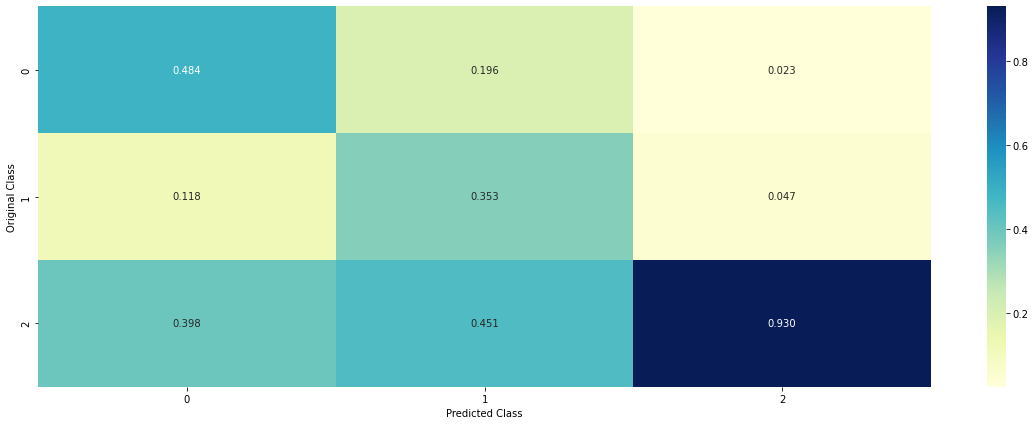

-------------------- Recall matrix (Row sum=1) --------------------


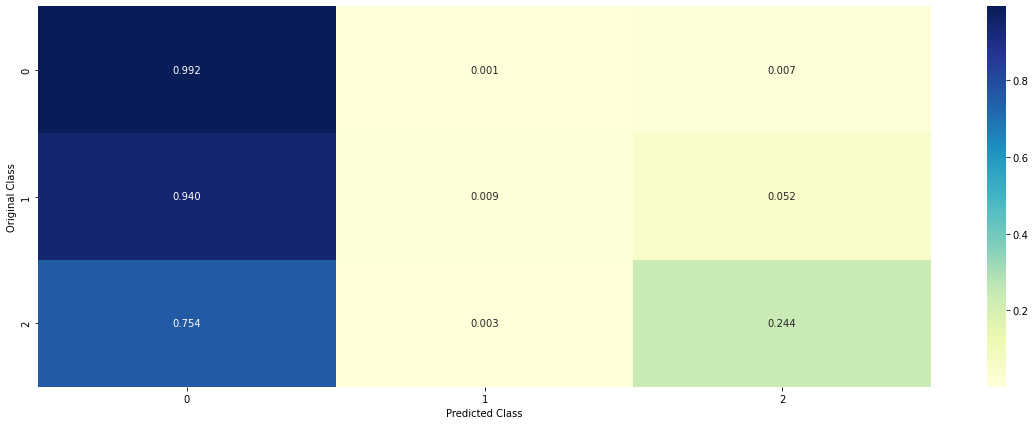

In [34]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(final_4gram_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_4gram_train, Y_train)

predict_y = sig_clf.predict_proba(final_4gram_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_4gram_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

TFIDF

In [106]:
import pickle

For values of alpha =  1e-05 The log loss is: 0.15677637902770436
For values of alpha =  0.0001 The log loss is: 0.2410772202718961
For values of alpha =  0.001 The log loss is: 0.5744469934942744
For values of alpha =  0.01 The log loss is: 0.830260441450271
For values of alpha =  0.1 The log loss is: 0.9625665812825516
For values of alpha =  1 The log loss is: 0.9625665812825683
For values of alpha =  10 The log loss is: 0.9625665812825773


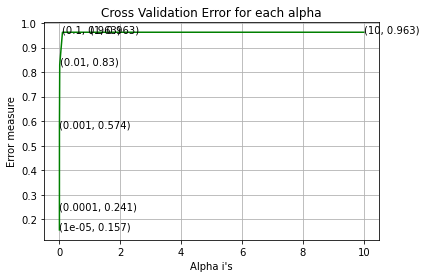

In [83]:
alpha = [10 ** x for x in range(-5, 2)]

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='log', random_state=42)
    clf.fit(X_train_vector1, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_vector1, Y_train)
    predict_y = sig_clf.predict_proba(X_test_vector1)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



In [110]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_vector1, Y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, loss='log',
                                                    random_state=42))

In [113]:
pickle.dump(clf, open('lgtfidf.pkl', 'wb'))

In [114]:
pickled_model = pickle.load(open('lgtfidf.pkl', 'rb'))
pickled_model.predict(X_test_vector1)

array([2, 2, 2, ..., 0, 2, 2])

For values of best alpha =  1e-05 The train log loss is: 0.14242764707918415
For values of best alpha =  1e-05 The test log loss is: 0.15677637902770436
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


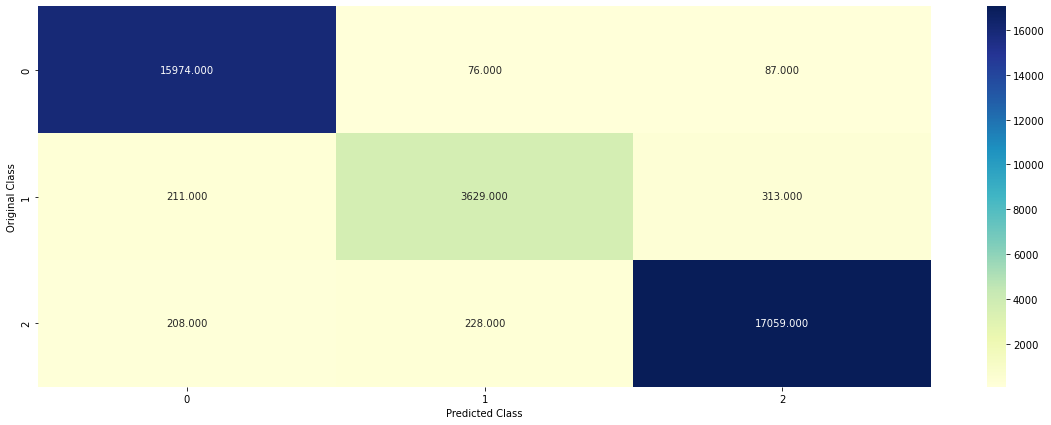

-------------------- Precision matrix (Columm Sum=1) --------------------


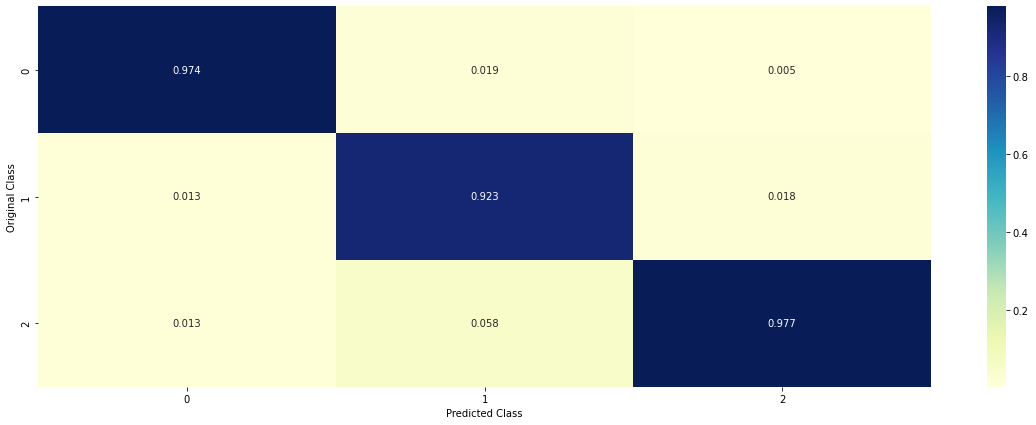

-------------------- Recall matrix (Row sum=1) --------------------


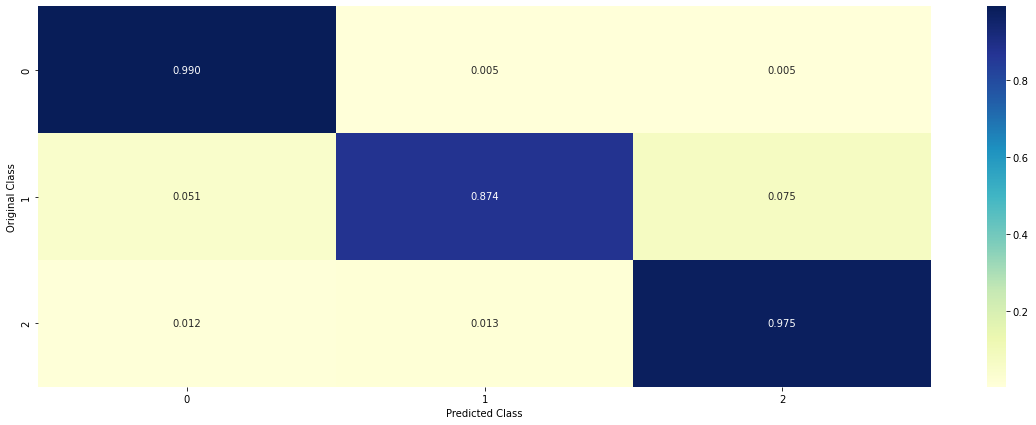

In [84]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='log', random_state=42)
clf.fit(X_train_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_vector1, Y_train)


predict_y = sig_clf.predict_proba(X_train_vector1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_vector1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

TFIDFW2V

For values of alpha =  1e-05 The log loss is: 0.5704991104646071
For values of alpha =  0.0001 The log loss is: 0.5700285630079407
For values of alpha =  0.001 The log loss is: 0.588499903362772
For values of alpha =  0.01 The log loss is: 0.6557202683331349
For values of alpha =  0.1 The log loss is: 0.740914687502105
For values of alpha =  1 The log loss is: 0.8216728610544204
For values of alpha =  10 The log loss is: 0.9046870359812663


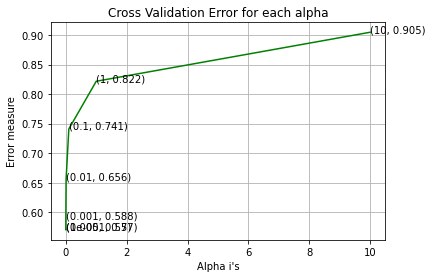

In [160]:

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(tfidf_sent_vectors, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tfidf_sent_vectors, Y_train)
    predict_y = sig_clf.predict_proba(tfidf_sent_vectors_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



For values of best alpha =  0.0001 The train log loss is: 0.558341377226264
For values of best alpha =  0.0001 The test log loss is: 0.5700285630079407
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


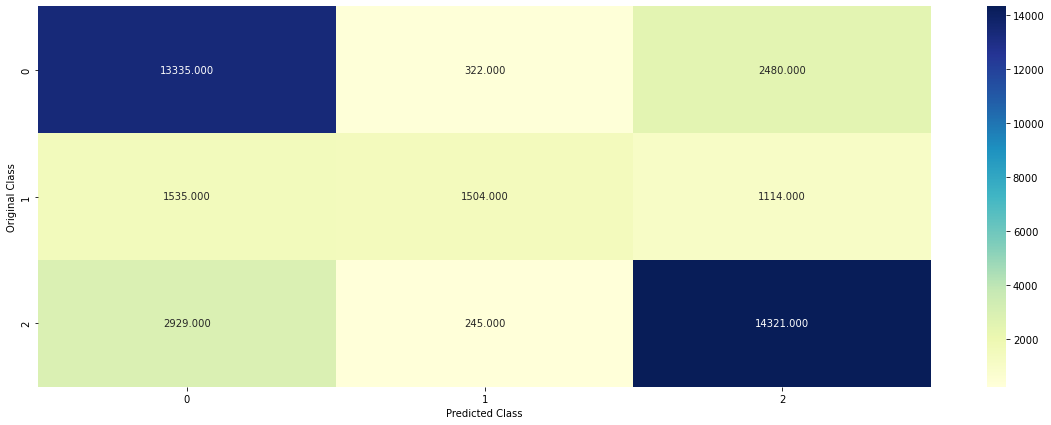

-------------------- Precision matrix (Columm Sum=1) --------------------


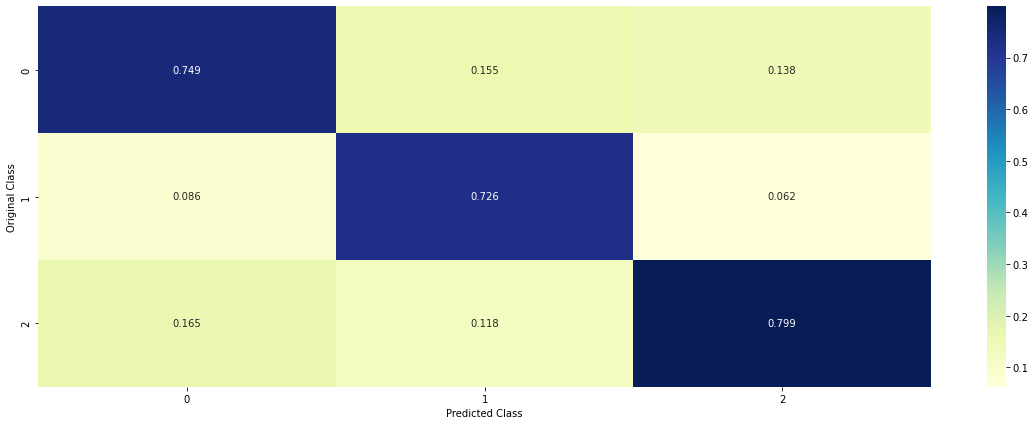

-------------------- Recall matrix (Row sum=1) --------------------


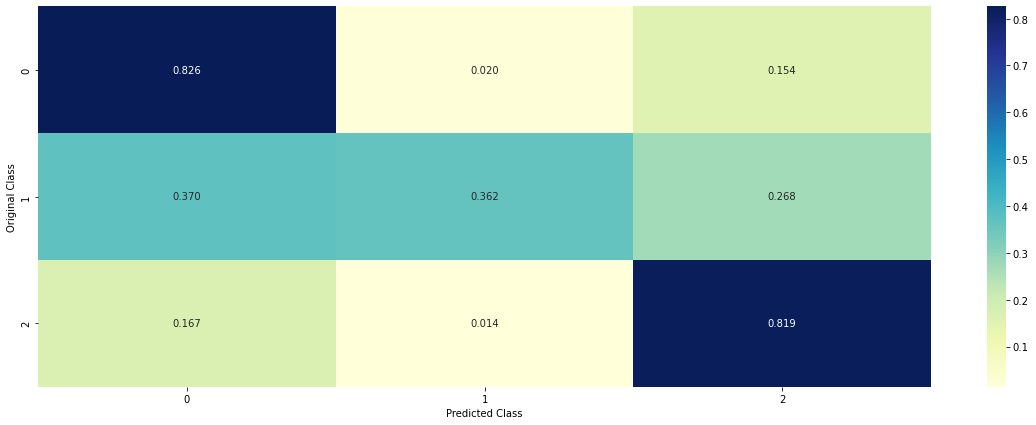

In [161]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(tfidf_sent_vectors, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tfidf_sent_vectors, Y_train)

predict_y = sig_clf.predict_proba(tfidf_sent_vectors)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(tfidf_sent_vectors_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.37168648579930613
For values of alpha =  0.0001 The log loss is: 0.4980678463575717
For values of alpha =  0.001 The log loss is: 0.4736690734695959
For values of alpha =  0.01 The log loss is: 0.7746059125212401
For values of alpha =  0.1 The log loss is: 0.8885561137817863
For values of alpha =  1 The log loss is: 0.9569932096485088
For values of alpha =  10 The log loss is: 0.9625665812825849


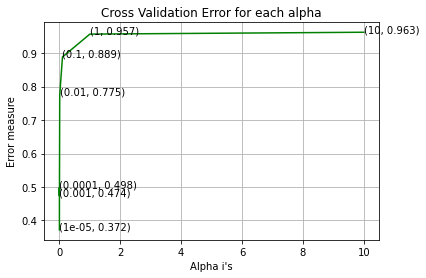

For values of best alpha =  1e-05 The train log loss is: 0.3574810331504453
For values of best alpha =  1e-05 The test log loss is: 0.37168648579930613
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


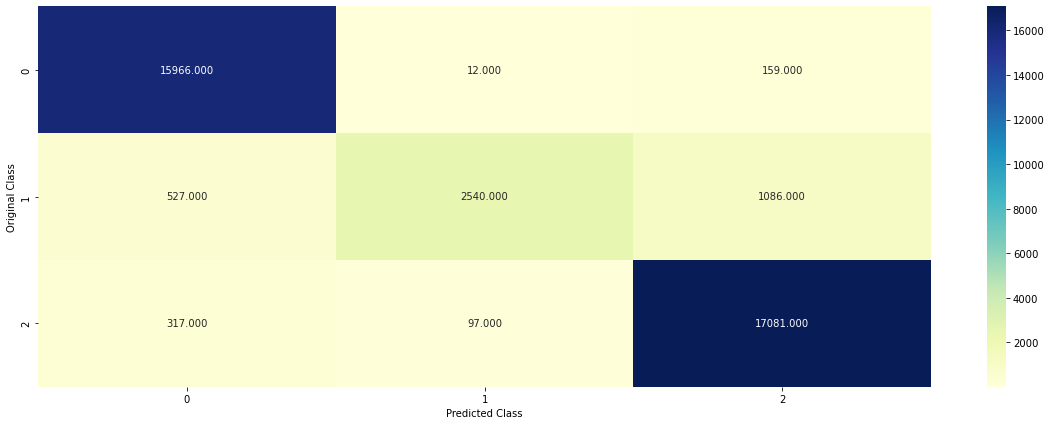

-------------------- Precision matrix (Columm Sum=1) --------------------


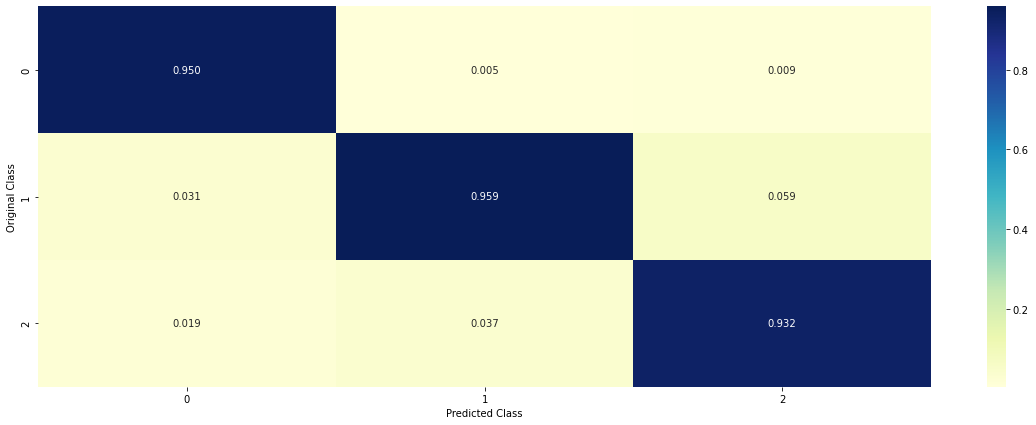

-------------------- Recall matrix (Row sum=1) --------------------


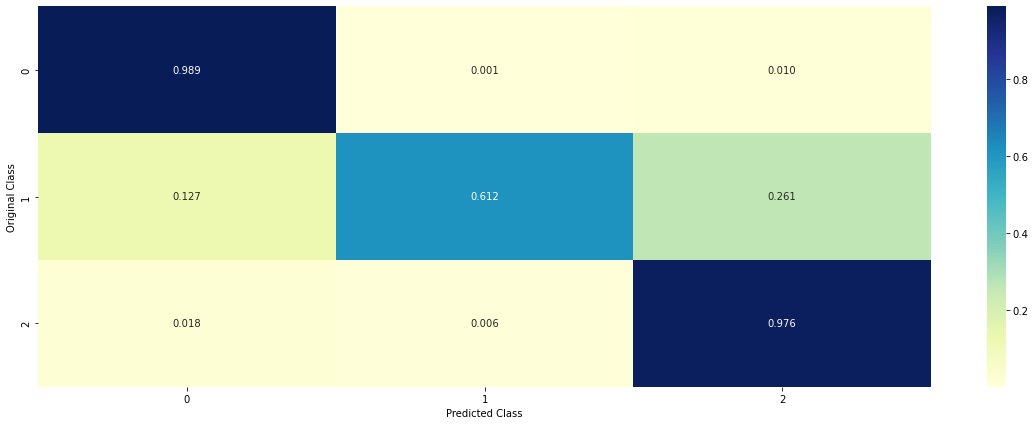

In [163]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(bow_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(bow_train, Y_train)
    predict_y = sig_clf.predict_proba(bow_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(bow_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(bow_train, Y_train)

predict_y = sig_clf.predict_proba(bow_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(bow_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

In [ ]:
4grams-final_4gram_train

For values of alpha =  1e-05 The log loss is: 1.1693151981225296
For values of alpha =  0.0001 The log loss is: 1.06140270231977
For values of alpha =  0.001 The log loss is: 1.0211560154347301
For values of alpha =  0.01 The log loss is: 1.0040852075579145
For values of alpha =  0.1 The log loss is: 0.9734351395421703
For values of alpha =  1 The log loss is: 0.9624832315267614
For values of alpha =  10 The log loss is: 0.9625665812825849


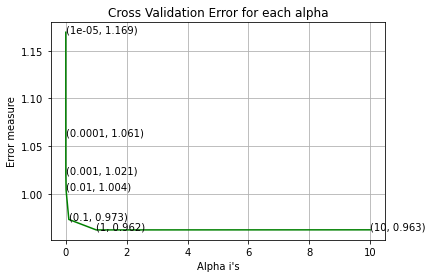

For values of best alpha =  1 The train log loss is: 0.9568990203967014
For values of best alpha =  1 The test log loss is: 0.9624832315267614
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


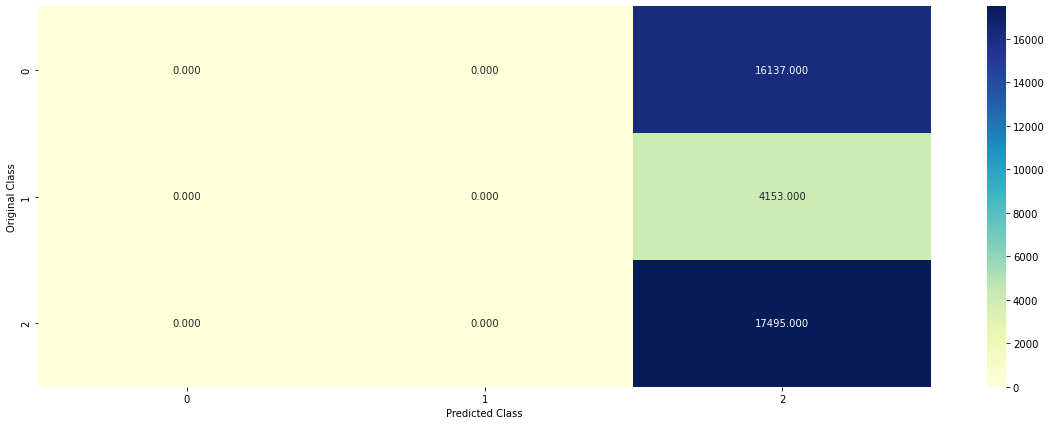

-------------------- Precision matrix (Columm Sum=1) --------------------


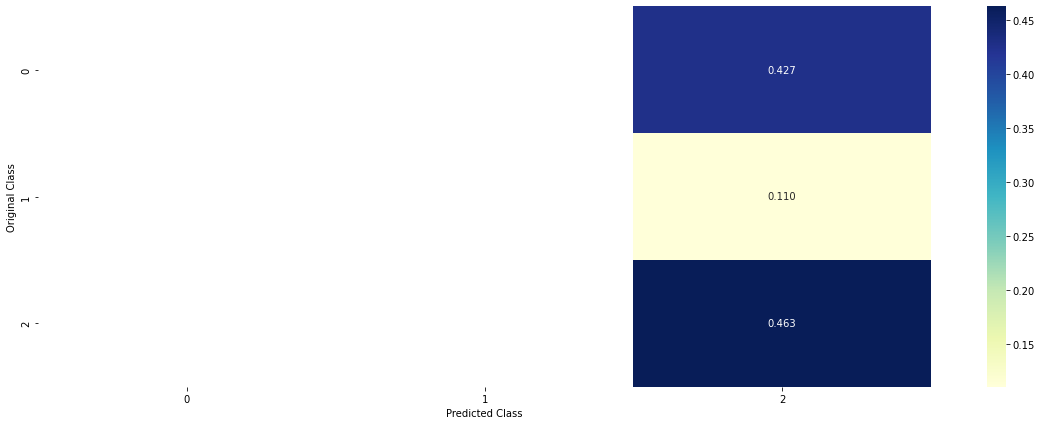

-------------------- Recall matrix (Row sum=1) --------------------


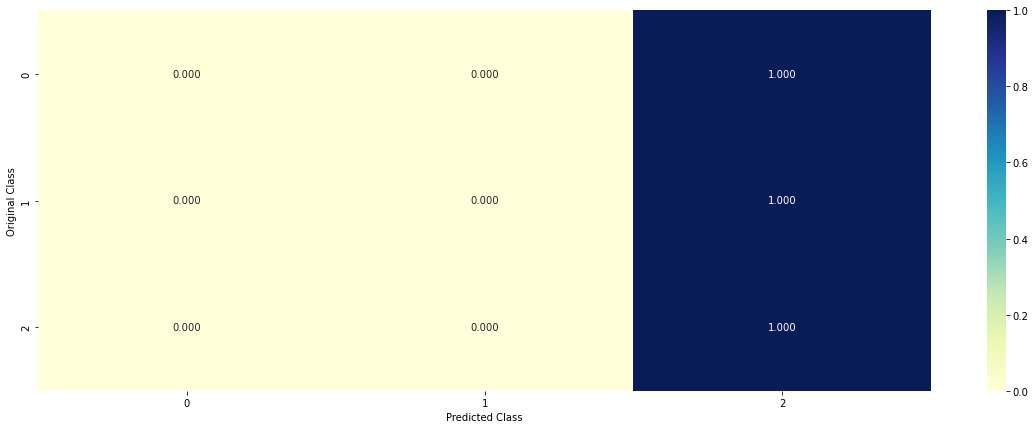

In [164]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(final_4gram_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(final_4gram_train, Y_train)
    predict_y = sig_clf.predict_proba(final_4gram_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(final_4gram_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_4gram_train, Y_train)

predict_y = sig_clf.predict_proba(final_4gram_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_4gram_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

In [ ]:
For values of alpha =  1e-05 The log loss is: 0.17727137780230098
For values of alpha =  0.0001 The log loss is: 0.22961986124550418
For values of alpha =  0.001 The log loss is: 0.4944101342186086
For values of alpha =  0.01 The log loss is: 0.8170177757253951
For values of alpha =  0.1 The log loss is: 0.9625665812825737
For values of alpha =  1 The log loss is: 0.9625665812825779
For values of alpha =  10 The log loss is: 0.9625665812825662


In [ ]:
tfidf -X_train_vector1

For values of alpha =  1e-06 The log loss is: 0.19959132903348575
For values of alpha =  1e-05 The log loss is: 0.18280689321150667
For values of alpha =  0.0001 The log loss is: 0.2288112231383242
For values of alpha =  0.001 The log loss is: 0.49282270343879675
For values of alpha =  0.01 The log loss is: 0.8169900795673964
For values of alpha =  0.1 The log loss is: 0.9625665812825737
For values of alpha =  1 The log loss is: 0.9625665812825779
For values of alpha =  10 The log loss is: 0.9625665812825662


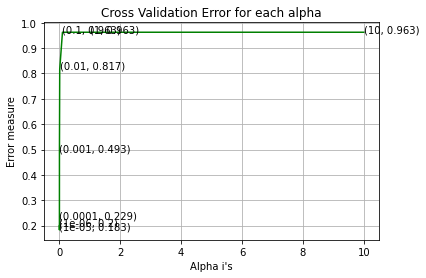

In [79]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train_vector1, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_vector1, Y_train)
    predict_y = sig_clf.predict_proba(X_test_vector1)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



In [42]:
X_train_vector1.shape

(76715, 3262)

In [43]:
Y_train.shape

(76715,)

In [56]:
import pickle as pickle

In [63]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_vector1, Y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, penalty='l1',
                                                    random_state=42))

In [64]:
pickle.dump(clf, open('svmtfidf1.pkl', 'wb'))

In [65]:
pickled_model = pickle.load(open('svmtfidf1.pkl', 'rb'))
pickled_model.predict(X_test_vector1)

array([0, 2, 2, ..., 0, 1, 2])

For values of best alpha =  1e-05 The train log loss is: 0.17167814579032017
For values of best alpha =  1e-05 The test log loss is: 0.18280689321150667
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


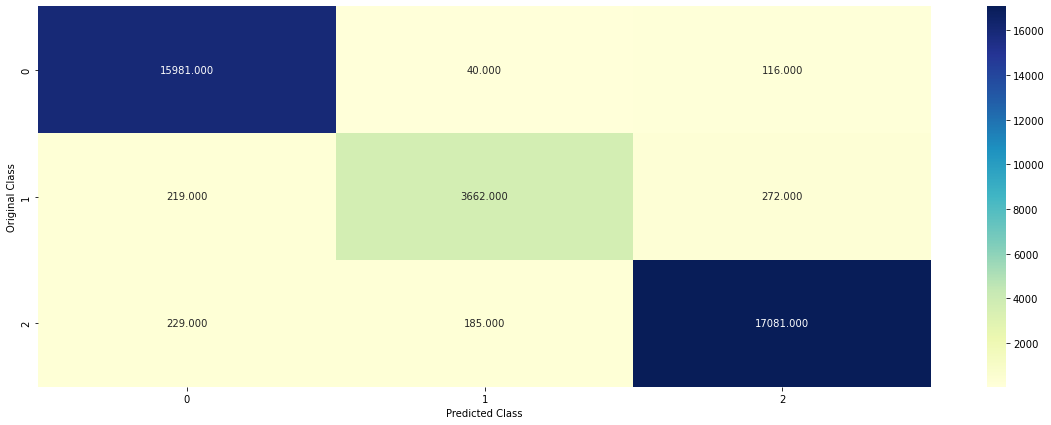

-------------------- Precision matrix (Columm Sum=1) --------------------


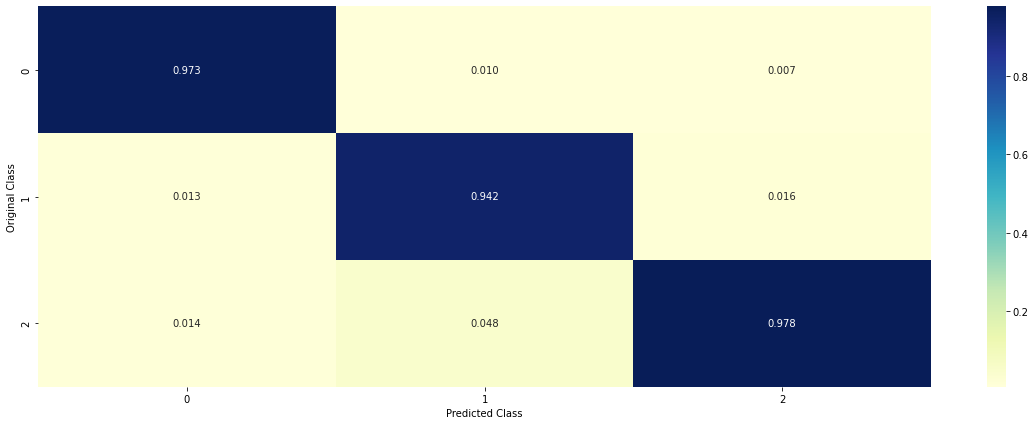

-------------------- Recall matrix (Row sum=1) --------------------


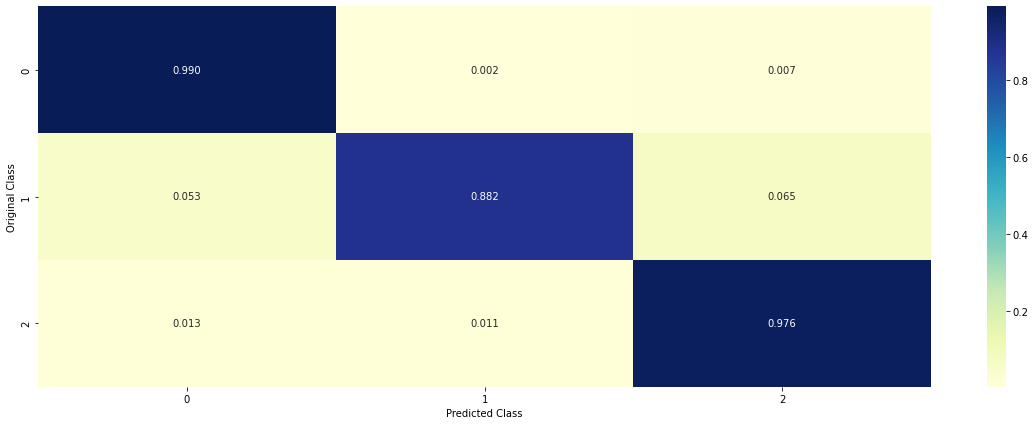

In [80]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_vector1, Y_train)

predict_y = sig_clf.predict_proba(X_train_vector1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_vector1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

In [74]:
tfidfw2v- tfidf_sent_vectors



NameError: name 'tfidfw2v' is not defined

For values of alpha =  1e-05 The log loss is: 0.5746998978728292
For values of alpha =  0.0001 The log loss is: 0.578041314487569
For values of alpha =  0.001 The log loss is: 0.6153774435788186
For values of alpha =  0.01 The log loss is: 0.7998511640205259
For values of alpha =  0.1 The log loss is: 0.9036394929877385
For values of alpha =  1 The log loss is: 0.9625665812825406
For values of alpha =  10 The log loss is: 0.9625665812825209


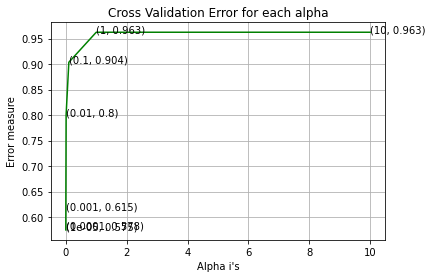

For values of best alpha =  1e-05 The train log loss is: 0.5620649948193299
For values of best alpha =  1e-05 The test log loss is: 0.5746998978728292
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


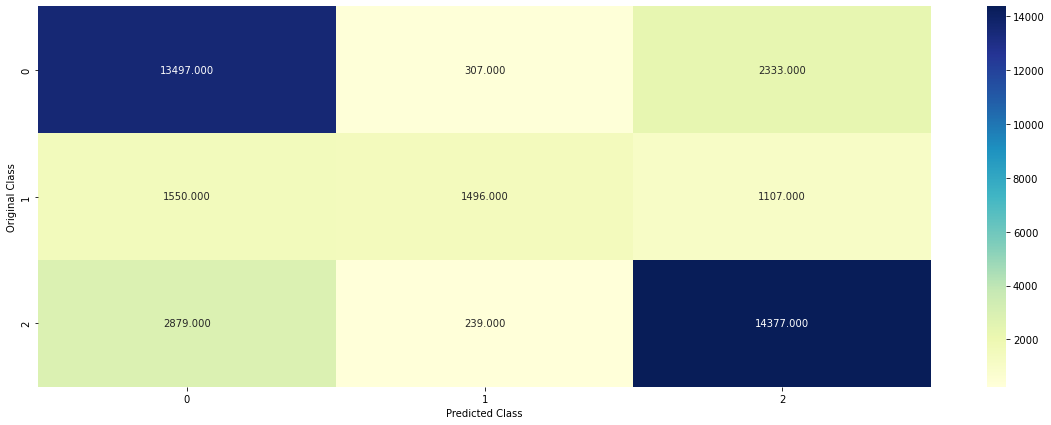

-------------------- Precision matrix (Columm Sum=1) --------------------


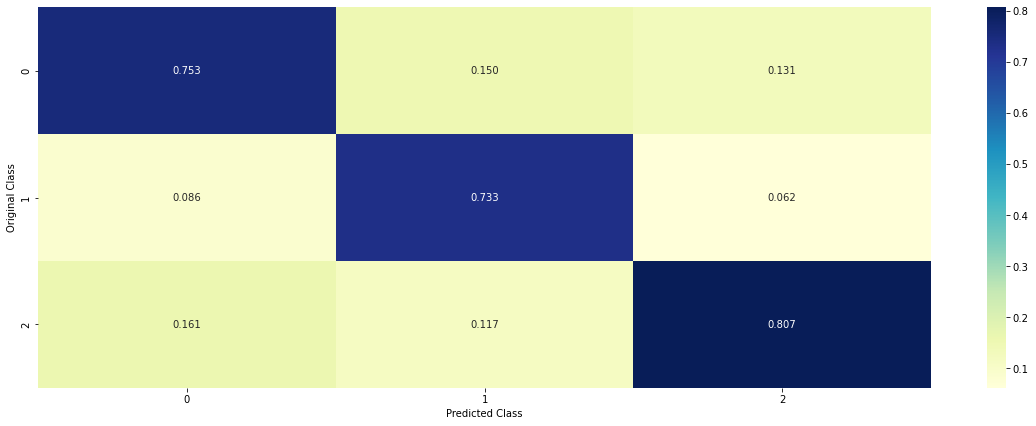

-------------------- Recall matrix (Row sum=1) --------------------


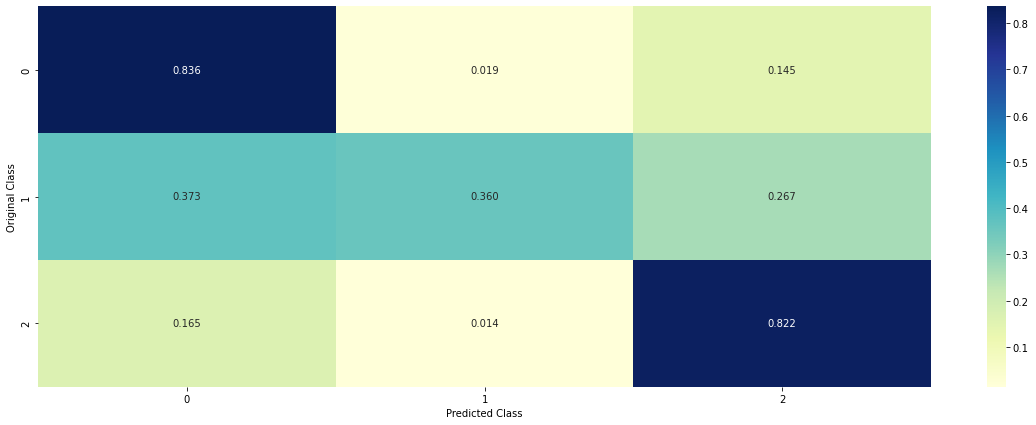

In [166]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(tfidf_sent_vectors, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tfidf_sent_vectors, Y_train)
    predict_y = sig_clf.predict_proba(tfidf_sent_vectors_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(tfidf_sent_vectors, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tfidf_sent_vectors, Y_train)

predict_y = sig_clf.predict_proba(tfidf_sent_vectors)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(tfidf_sent_vectors_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

Naive Bayes

bow_train

for alpha = 1e-05
For values of alpha= 1e-05 Log Loss : 0.5132140175910119
for alpha = 0.0001
For values of alpha= 0.0001 Log Loss : 0.5082135988920238
for alpha = 0.001
For values of alpha= 0.001 Log Loss : 0.4996567526801674
for alpha = 0.1
For values of alpha= 0.1 Log Loss : 0.47654330119681504
for alpha = 1
For values of alpha= 1 Log Loss : 0.4760834963908071
for alpha = 10
For values of alpha= 10 Log Loss : 0.6215342947628126
for alpha = 100
For values of alpha= 100 Log Loss : 0.797380132834184
for alpha = 1000
For values of alpha= 1000 Log Loss : 0.8509132142087439


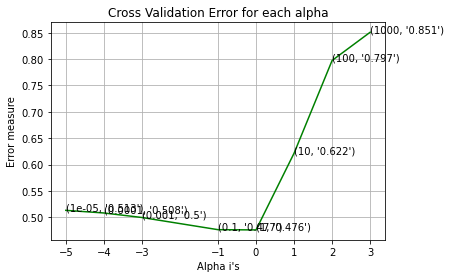

In [64]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(bow_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(bow_train, Y_train)
    predict_y = sig_clf.predict_proba(bow_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For values of alpha=",i,"Log Loss :",log_loss(Y_test, predict_y,labels=clf.classes_,eps=1e-15)) 
    
    

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



For values of best alpha =  1 The train log loss is: 0.42150270991151
For values of best alpha =  1 The test log loss is: 0.4760834963908071
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


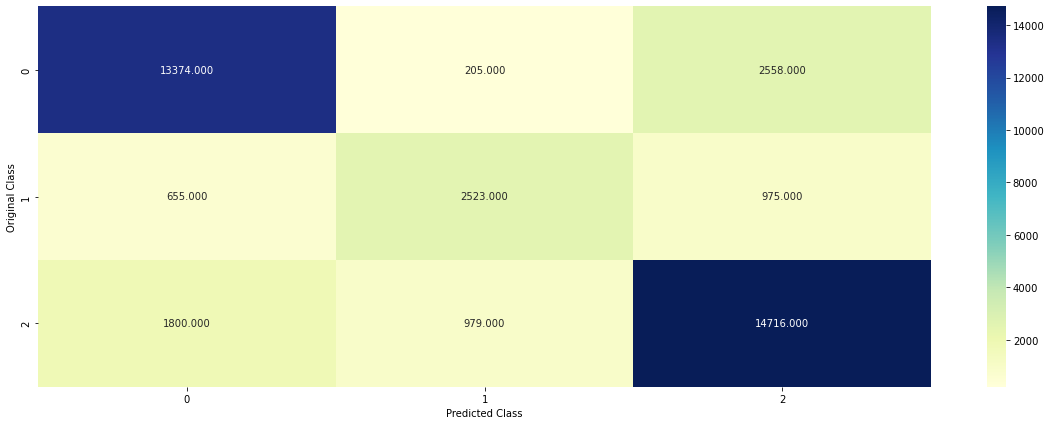

-------------------- Precision matrix (Columm Sum=1) --------------------


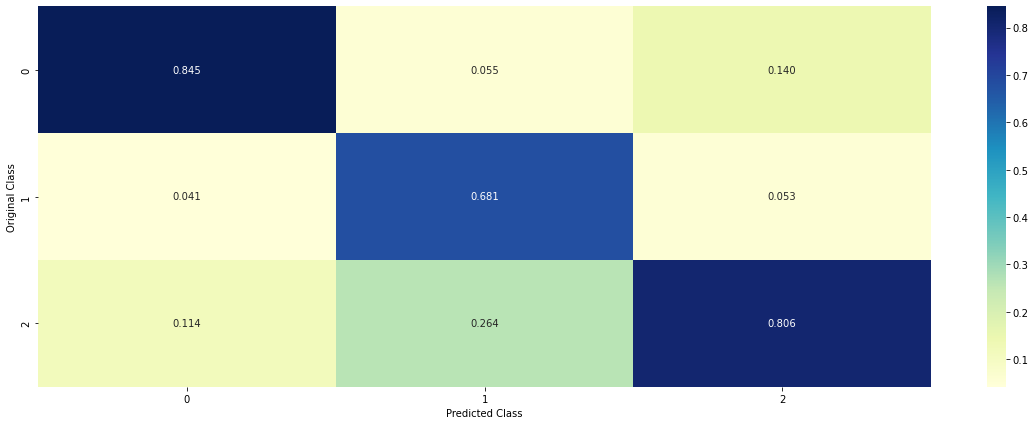

-------------------- Recall matrix (Row sum=1) --------------------


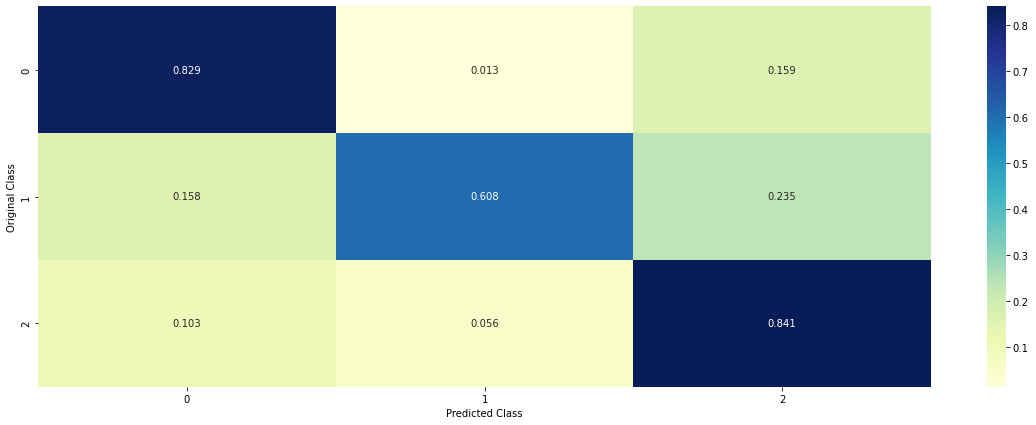

In [65]:

best_alpha = np.argmin(log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(bow_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(bow_train, Y_train)


predict_y = sig_clf.predict_proba(bow_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(bow_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)


final_4gram_train

for alpha = 1e-05
For values of alpha= 1e-05 Log Loss : 1.3863665268400318
for alpha = 0.0001
For values of alpha= 0.0001 Log Loss : 1.381882774893415
for alpha = 0.001
For values of alpha= 0.001 Log Loss : 1.3716720910962703
for alpha = 0.1
For values of alpha= 0.1 Log Loss : 1.3179349235735305
for alpha = 1
For values of alpha= 1 Log Loss : 1.2471234976831909
for alpha = 10
For values of alpha= 10 Log Loss : 1.15883599482829
for alpha = 100
For values of alpha= 100 Log Loss : 1.217674548053093
for alpha = 1000
For values of alpha= 1000 Log Loss : 1.5711623372493233


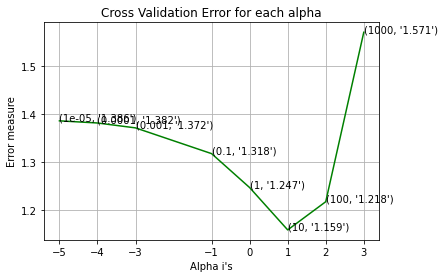

In [66]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(final_4gram_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(final_4gram_train, Y_train)
    predict_y = sig_clf.predict_proba(final_4gram_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For values of alpha=",i,"Log Loss :",log_loss(Y_test, predict_y,labels=clf.classes_,eps=1e-15)) 
    
    

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



For values of best alpha =  10 The train log loss is: 0.7211596109582157
For values of best alpha =  10 The test log loss is: 1.15883599482829
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


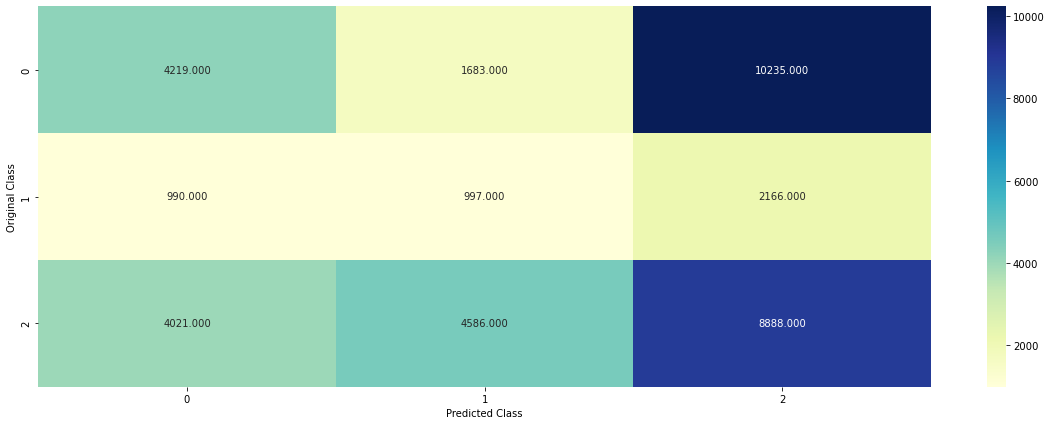

-------------------- Precision matrix (Columm Sum=1) --------------------


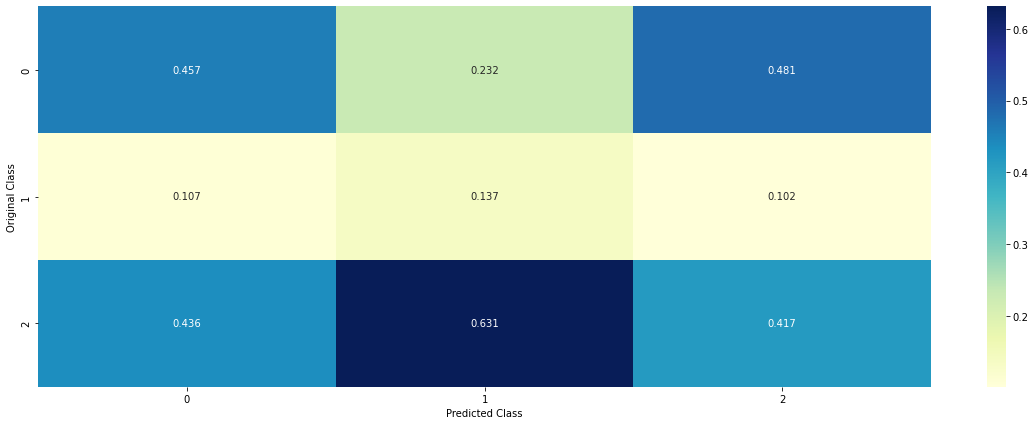

-------------------- Recall matrix (Row sum=1) --------------------


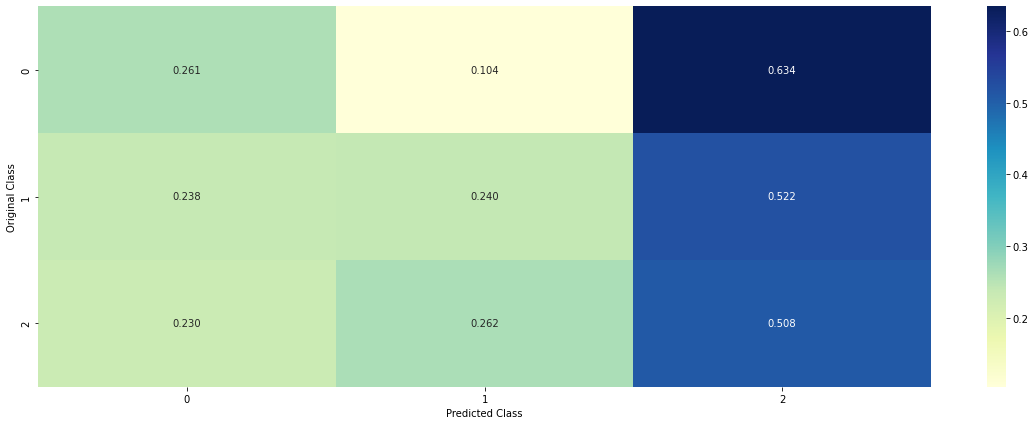

In [67]:

best_alpha = np.argmin(log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(final_4gram_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_4gram_train, Y_train)


predict_y = sig_clf.predict_proba(final_4gram_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_4gram_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)


X_train_vector1

for alpha = 1e-06
For values of alpha= 1e-06 Log Loss : 0.30902743643095976
for alpha = 1e-05
For values of alpha= 1e-05 Log Loss : 0.3085567352926516
for alpha = 0.0001
For values of alpha= 0.0001 Log Loss : 0.30779025324201015
for alpha = 0.001
For values of alpha= 0.001 Log Loss : 0.3066294667484485
for alpha = 0.1
For values of alpha= 0.1 Log Loss : 0.3068538945228809
for alpha = 1
For values of alpha= 1 Log Loss : 0.33169320522137064
for alpha = 10
For values of alpha= 10 Log Loss : 0.44324917059595514
for alpha = 100
For values of alpha= 100 Log Loss : 0.5956955377972187
for alpha = 1000
For values of alpha= 1000 Log Loss : 0.6987002035177476


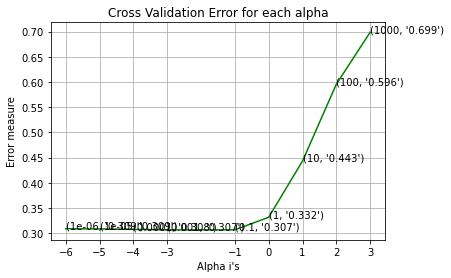

In [129]:
alpha = [0.000001,0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train_vector1, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_vector1, Y_train)
    predict_y = sig_clf.predict_proba(X_test_vector1)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For values of alpha=",i,"Log Loss :",log_loss(Y_test, predict_y,labels=clf.classes_,eps=1e-15)) 
    
    

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



For values of best alpha =  0.001 The train log loss is: 0.26035726932865677
For values of best alpha =  0.001 The test log loss is: 0.3066294667484485
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


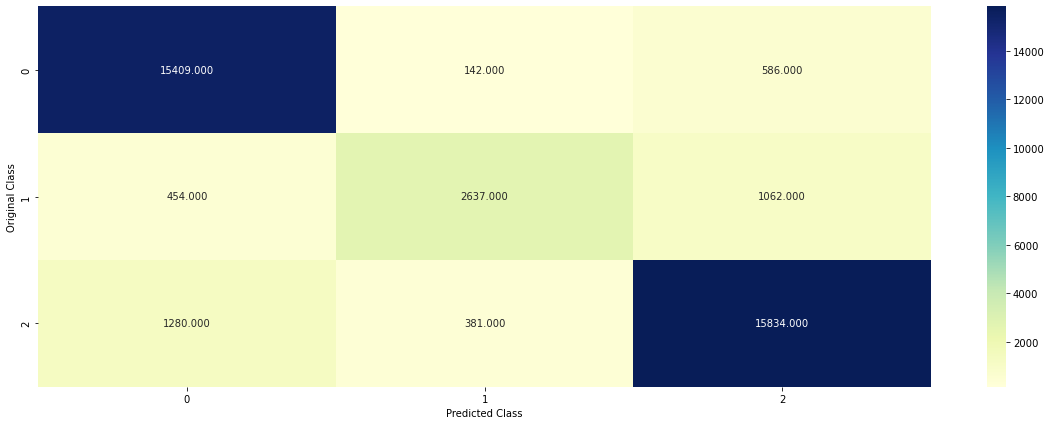

-------------------- Precision matrix (Columm Sum=1) --------------------


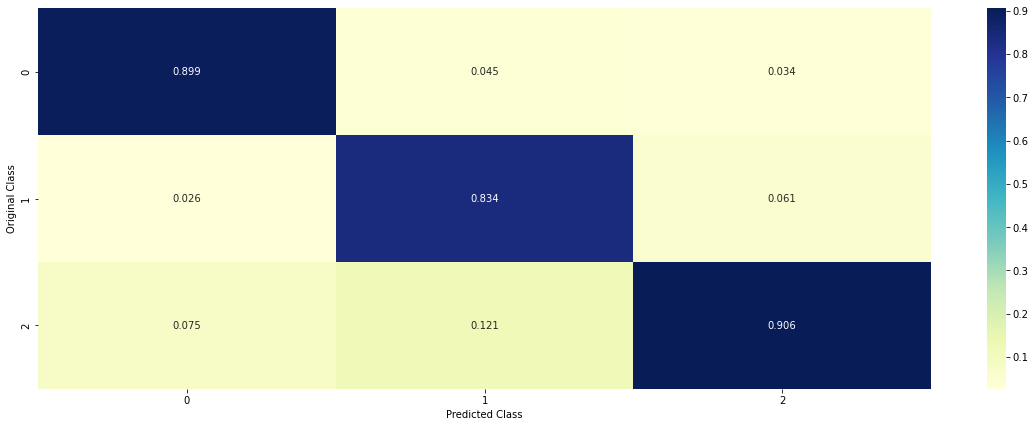

-------------------- Recall matrix (Row sum=1) --------------------


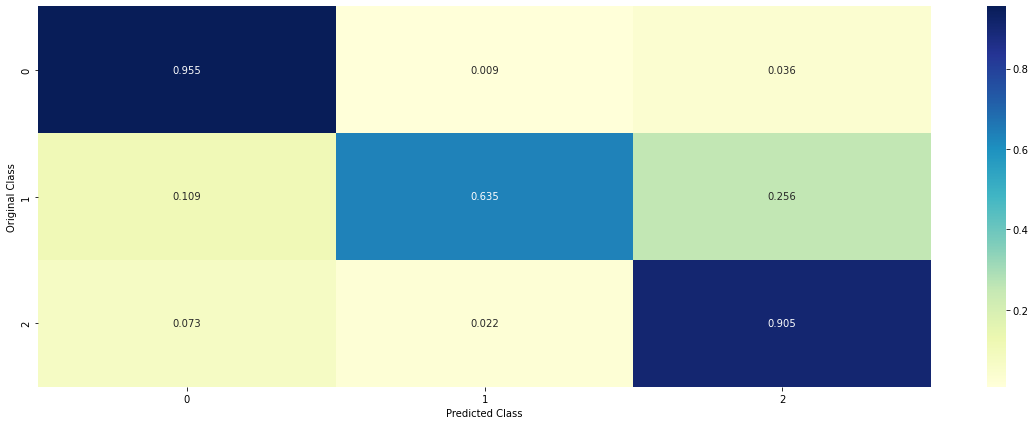

In [130]:

best_alpha = np.argmin(log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_train_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_vector1, Y_train)


predict_y = sig_clf.predict_proba(X_train_vector1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_vector1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)


LG with With Class balancing

for alpha = 1e-06
Log Loss : 0.5659265661061023
for alpha = 1e-05
Log Loss : 0.5688878161458288
for alpha = 0.0001
Log Loss : 0.3770247985321241
for alpha = 0.001
Log Loss : 0.43987944585197447
for alpha = 0.01
Log Loss : 0.6065399435639327
for alpha = 0.1
Log Loss : 0.7884047684099875
for alpha = 1
Log Loss : 0.8616635450167502
for alpha = 10
Log Loss : 0.8802427590386676
for alpha = 100
Log Loss : 0.8851914655635654


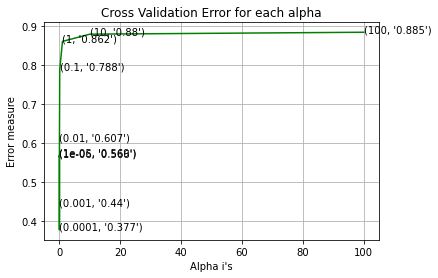

In [71]:
alpha = [10 ** x for x in range(-6, 3)]
log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(bow_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(bow_train, Y_train)
    predict_y = sig_clf.predict_proba(bow_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(Y_test, predict_y)) 

fig, ax = plt.subplots()
ax.plot(alpha,log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

    

For values of best alpha =  0.0001 The train log loss is: 0.35898337293736804
For values of best alpha =  0.0001 The test log loss is: 0.3770247985321241
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


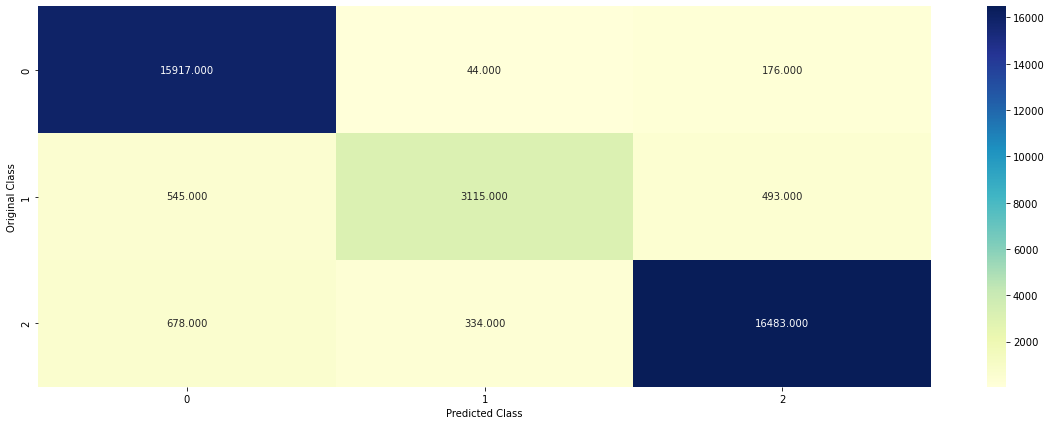

-------------------- Precision matrix (Columm Sum=1) --------------------


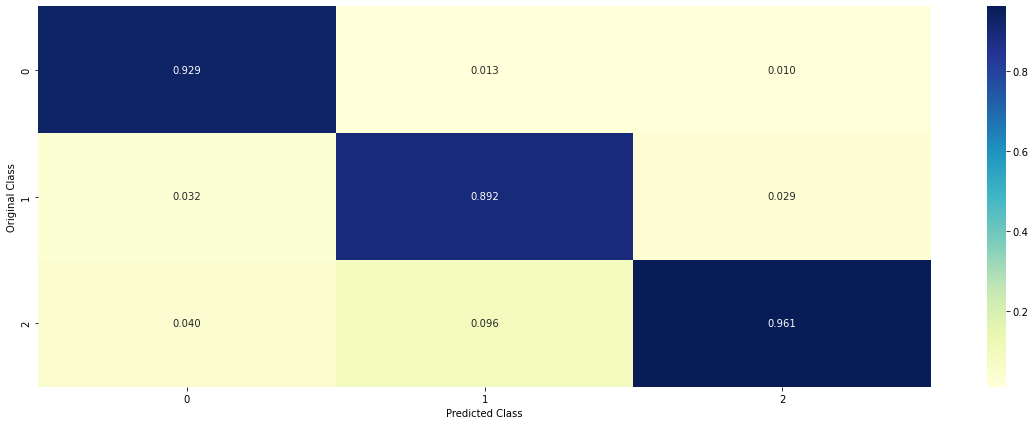

-------------------- Recall matrix (Row sum=1) --------------------


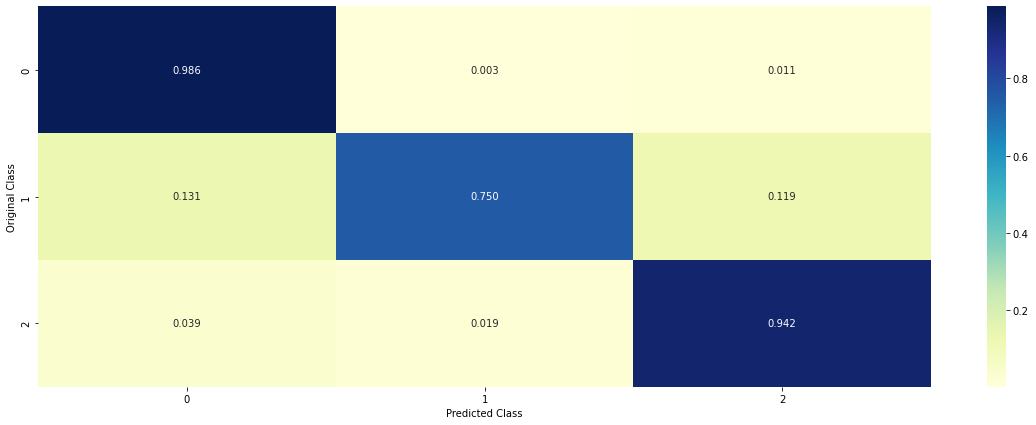

In [73]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(bow_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(bow_train, Y_train)

predict_y = sig_clf.predict_proba(bow_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(bow_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)


for alpha = 1e-06
Log Loss : 0.9932376219426577
for alpha = 1e-05
Log Loss : 1.094020070815883
for alpha = 0.0001
Log Loss : 1.0878335090429696
for alpha = 0.001
Log Loss : 1.080324947010214
for alpha = 0.01
Log Loss : 1.0363802442558223
for alpha = 0.1
Log Loss : 0.9930534706029323
for alpha = 1
Log Loss : 0.9827696555306309
for alpha = 10
Log Loss : 0.9772170690667666
for alpha = 100
Log Loss : 0.9737562887032635


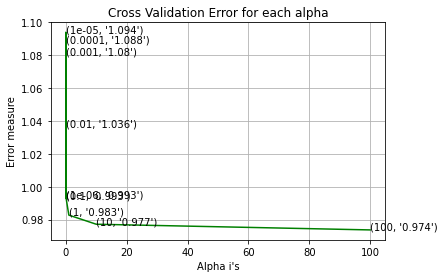

In [75]:
alpha = [10 ** x for x in range(-6, 3)]
log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(final_4gram_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(final_4gram_train, Y_train)
    predict_y = sig_clf.predict_proba(final_4gram_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(Y_test, predict_y)) 

fig, ax = plt.subplots()
ax.plot(alpha,log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

    

For values of best alpha =  100 The train log loss is: 0.8852300593014608
For values of best alpha =  100 The test log loss is: 0.9737562887032635
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


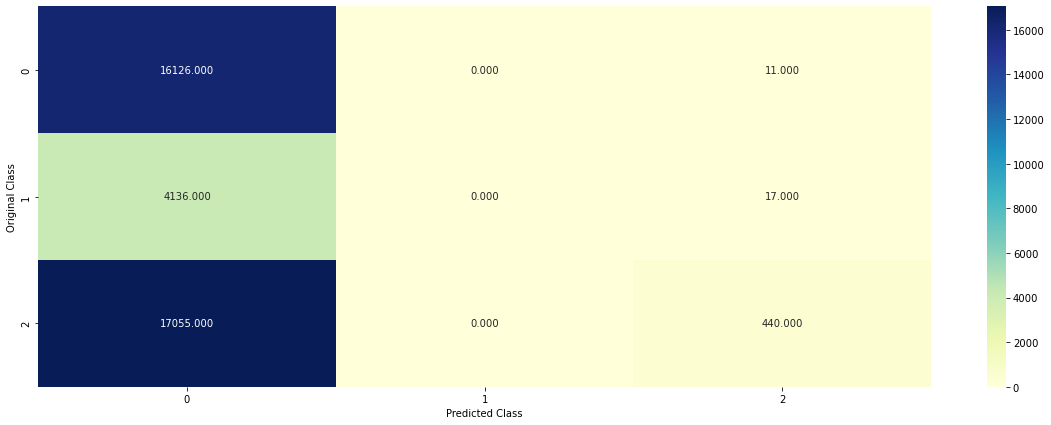

-------------------- Precision matrix (Columm Sum=1) --------------------


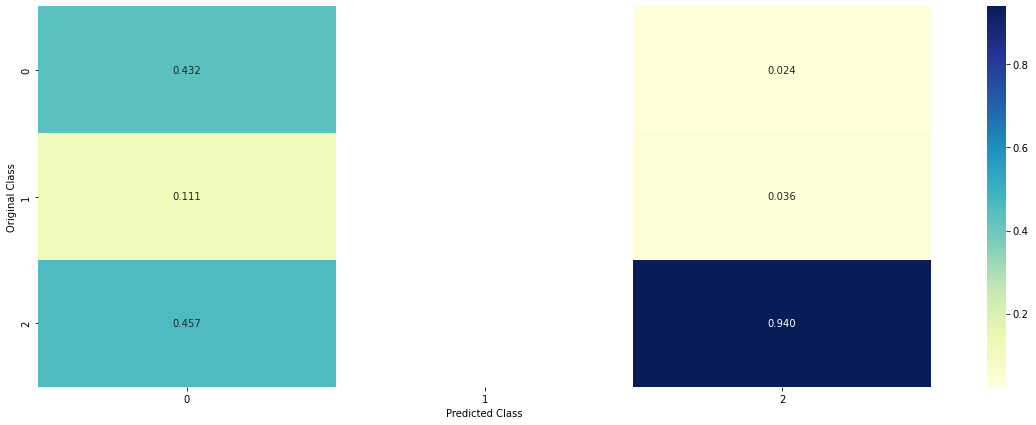

-------------------- Recall matrix (Row sum=1) --------------------


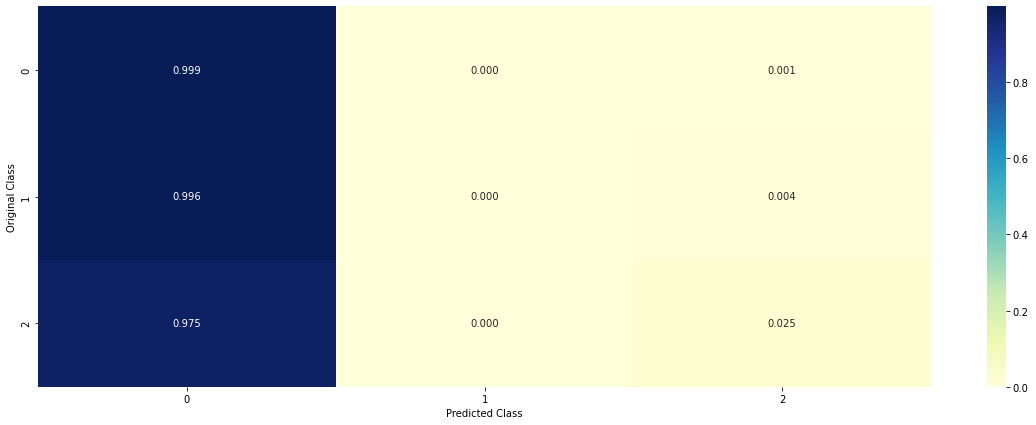

In [76]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(final_4gram_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_4gram_train, Y_train)

predict_y = sig_clf.predict_proba(final_4gram_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_4gram_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)


In [ ]:
X_train_vector1

for alpha = 1e-06
Log Loss : 0.15700909175796826
for alpha = 1e-05
Log Loss : 0.17570379956740148
for alpha = 0.0001
Log Loss : 0.2646572703354338
for alpha = 0.001
Log Loss : 0.4594627865166581
for alpha = 0.01
Log Loss : 0.6012588574477892
for alpha = 0.1
Log Loss : 0.7075369477763407
for alpha = 1
Log Loss : 0.7310326091345992
for alpha = 10
Log Loss : 0.7341892797968493
for alpha = 100
Log Loss : 0.7346379789912048


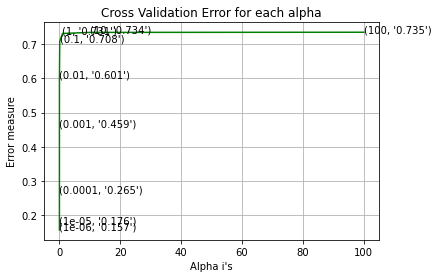

In [131]:
alpha = [10 ** x for x in range(-6, 3)]
log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_vector1, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_vector1, Y_train)
    predict_y = sig_clf.predict_proba(X_test_vector1)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(Y_test, predict_y)) 

fig, ax = plt.subplots()
ax.plot(alpha,log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

    

In [132]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_vector1, Y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-06,
                                                    class_weight='balanced',
                                                    loss='log',
                                                    random_state=42))

In [133]:
pickle.dump(clf, open('lgcbtfidf.pkl', 'wb'))

In [134]:
pickled_model = pickle.load(open('lgcbtfidf.pkl', 'rb'))
pickled_model.predict(X_test_vector1)

array([2, 2, 2, ..., 0, 2, 2])

For values of best alpha =  1e-06 The train log loss is: 0.1202588343518243
For values of best alpha =  1e-06 The test log loss is: 0.15700909175796826
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


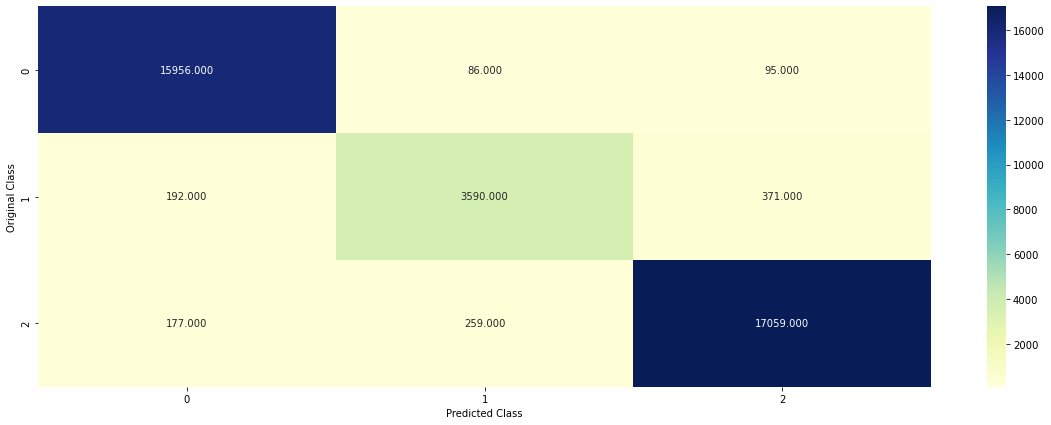

-------------------- Precision matrix (Columm Sum=1) --------------------


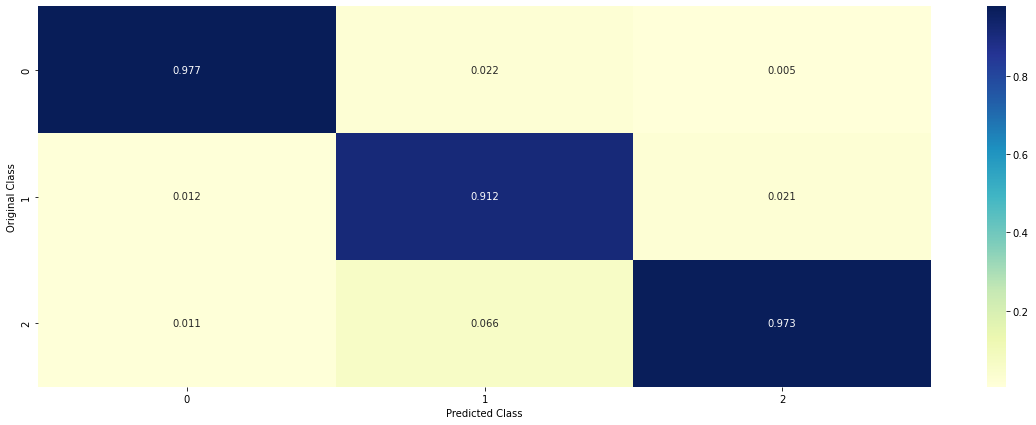

-------------------- Recall matrix (Row sum=1) --------------------


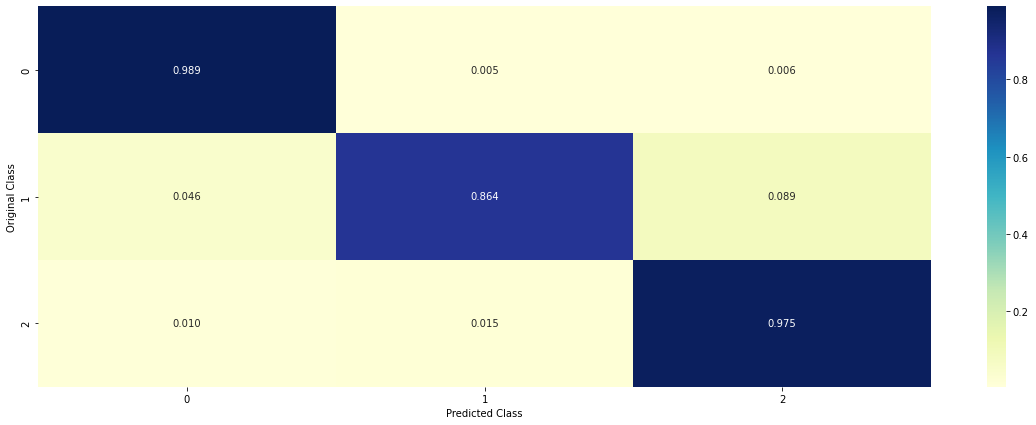

In [135]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_vector1, Y_train)

predict_y = sig_clf.predict_proba(X_train_vector1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_vector1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)


for alpha = 1e-06
Log Loss : 0.579185293698609
for alpha = 1e-05
Log Loss : 0.5732577316600309
for alpha = 0.0001
Log Loss : 0.5733999680049081
for alpha = 0.001
Log Loss : 0.5914196021487481
for alpha = 0.01
Log Loss : 0.6554499416681284
for alpha = 0.1
Log Loss : 0.7414158868888759
for alpha = 1
Log Loss : 0.8193639589348423
for alpha = 10
Log Loss : 0.831149963868828
for alpha = 100
Log Loss : 0.9094928189949922


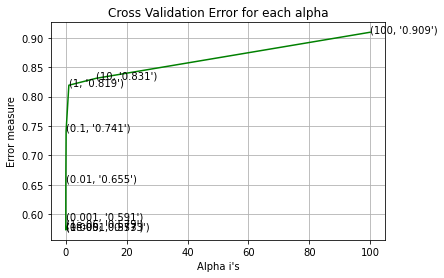

In [79]:
alpha = [10 ** x for x in range(-6, 3)]
log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(tfidf_sent_vectors, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tfidf_sent_vectors, Y_train)
    predict_y = sig_clf.predict_proba(tfidf_sent_vectors_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(Y_test, predict_y)) 

fig, ax = plt.subplots()
ax.plot(alpha,log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

    

For values of best alpha =  1e-05 The train log loss is: 0.5656318614429315
For values of best alpha =  1e-05 The test log loss is: 0.5732577316600309
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


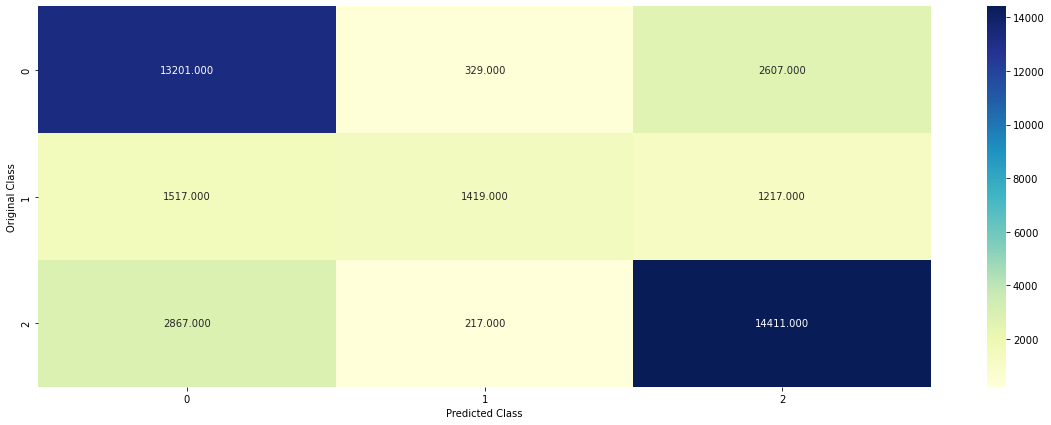

-------------------- Precision matrix (Columm Sum=1) --------------------


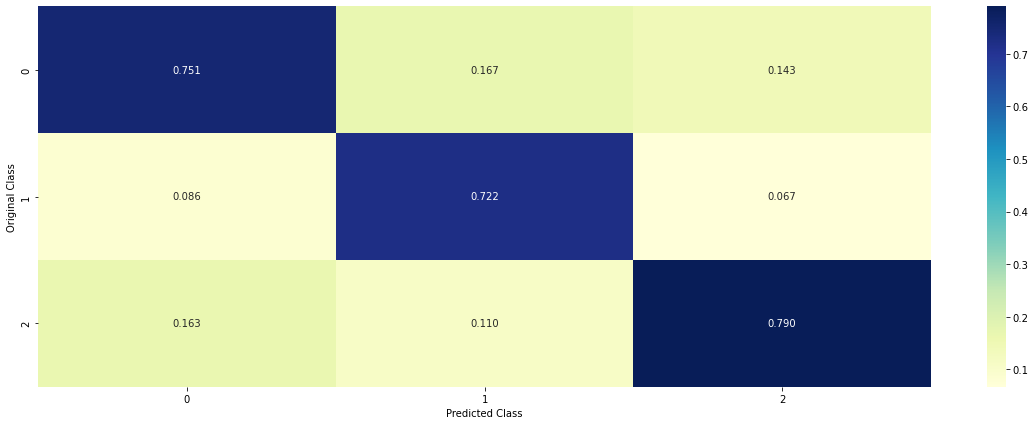

-------------------- Recall matrix (Row sum=1) --------------------


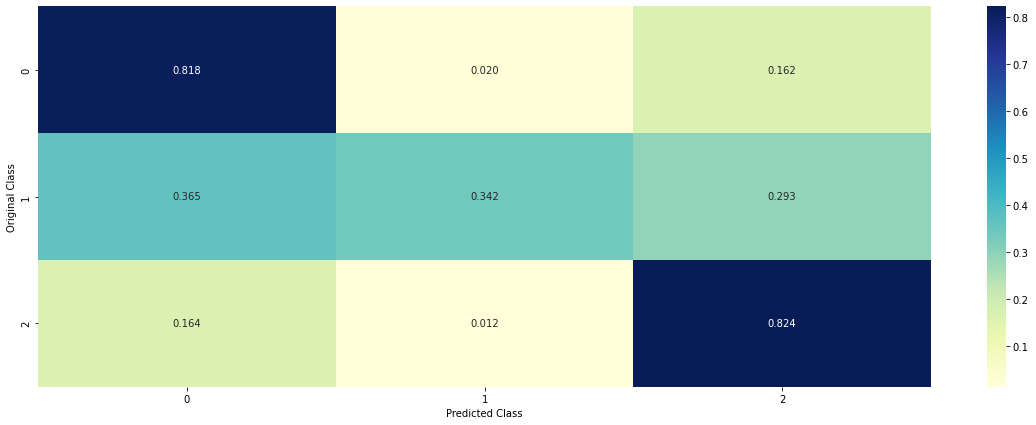

In [80]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(tfidf_sent_vectors, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tfidf_sent_vectors, Y_train)

predict_y = sig_clf.predict_proba(tfidf_sent_vectors)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(tfidf_sent_vectors_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)


Random Forest Classifier

In [ ]:
bow_train
final_4gram_train
X_train_vector1
tfidf_sent_vectors

for n_estimators = 100 and max depth =  5
Log Loss : 0.5758618776615722
for n_estimators = 100 and max depth =  10
Log Loss : 0.5026956648583648
for n_estimators = 200 and max depth =  5
Log Loss : 0.5454593136572856
for n_estimators = 200 and max depth =  10
Log Loss : 0.4823356877228092
for n_estimators = 500 and max depth =  5
Log Loss : 0.5429020805096645
for n_estimators = 500 and max depth =  10
Log Loss : 0.47664316568920706
for n_estimators = 1000 and max depth =  5
Log Loss : 0.5353679759773753
for n_estimators = 1000 and max depth =  10
Log Loss : 0.47465885439300076
for n_estimators = 2000 and max depth =  5
Log Loss : 0.5403088059741373
for n_estimators = 2000 and max depth =  10
Log Loss : 0.4767261587653152


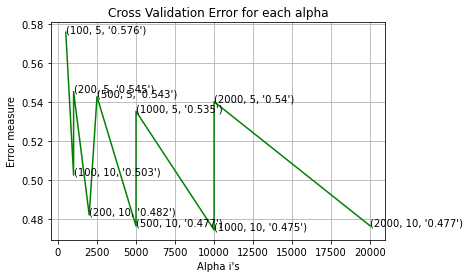

In [82]:


alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(bow_train, Y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(bow_train, Y_train)
        predict_y = sig_clf.predict_proba(bow_test)
        log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(Y_test, predict_y)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


For values of best estimator =  1000 The train log loss is: 0.45812727462646446
For values of best estimator =  1000 The cross validation log loss is: 0.474658854393001
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


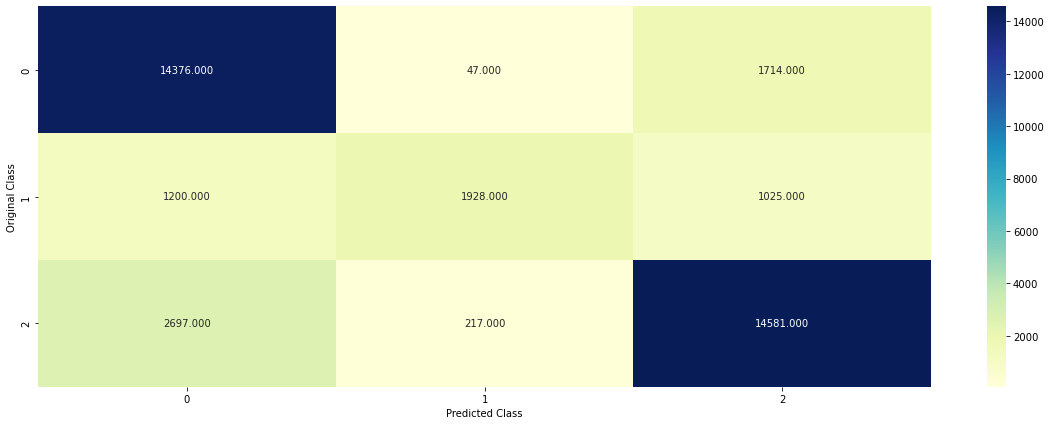

-------------------- Precision matrix (Columm Sum=1) --------------------


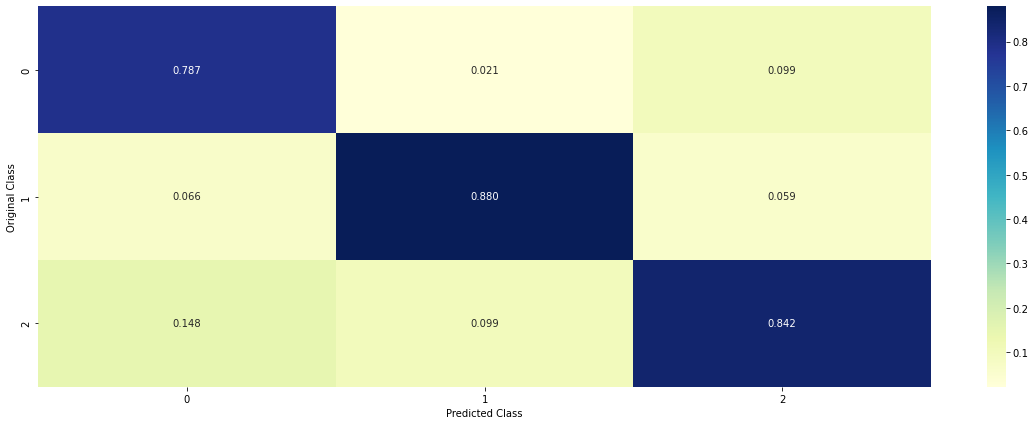

-------------------- Recall matrix (Row sum=1) --------------------


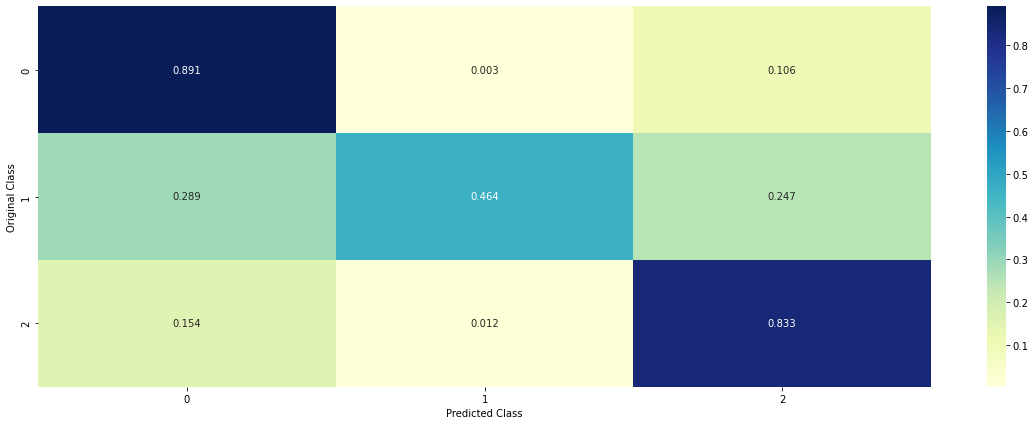

In [83]:

best_alpha = np.argmin(log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(bow_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(bow_train, Y_train)

predict_y = sig_clf.predict_proba(bow_train)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(bow_test)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

for n_estimators = 100 and max depth =  5
Log Loss : 1.2992284036977326
for n_estimators = 100 and max depth =  10
Log Loss : 1.3779644378578193
for n_estimators = 200 and max depth =  5
Log Loss : 1.324701939951636
for n_estimators = 200 and max depth =  10
Log Loss : 1.389766584633239
for n_estimators = 500 and max depth =  5
Log Loss : 1.3425351177724123
for n_estimators = 500 and max depth =  10
Log Loss : 1.4013372220469829
for n_estimators = 1000 and max depth =  5
Log Loss : 1.3354541759443554
for n_estimators = 1000 and max depth =  10
Log Loss : 1.3985704654079973
for n_estimators = 2000 and max depth =  5
Log Loss : 1.3337060469134168
for n_estimators = 2000 and max depth =  10
Log Loss : 1.3999308396199308


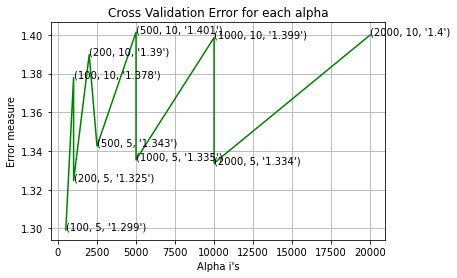

In [85]:


alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(final_4gram_train, Y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(final_4gram_train, Y_train)
        predict_y = sig_clf.predict_proba(final_4gram_test)
        log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(Y_test, predict_y)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


For values of best estimator =  100 The train log loss is: 0.561859811504753
For values of best estimator =  100 The cross validation log loss is: 1.2992284036301898
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


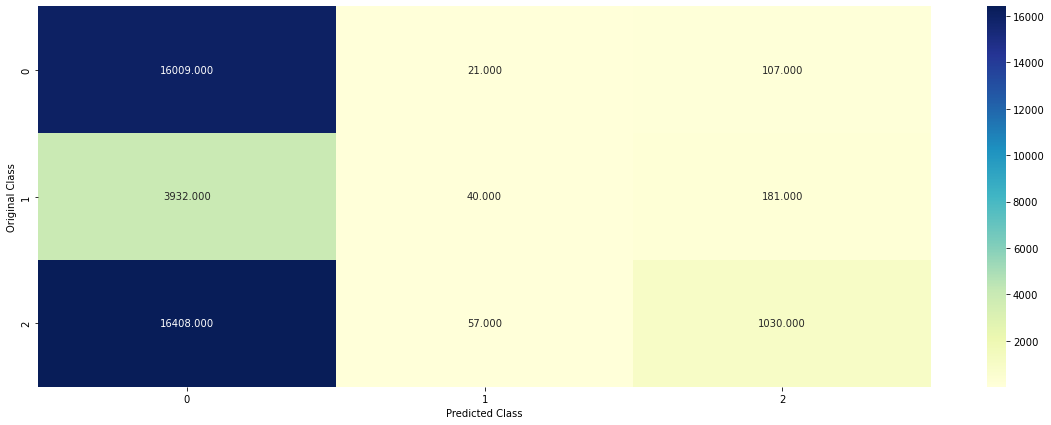

-------------------- Precision matrix (Columm Sum=1) --------------------


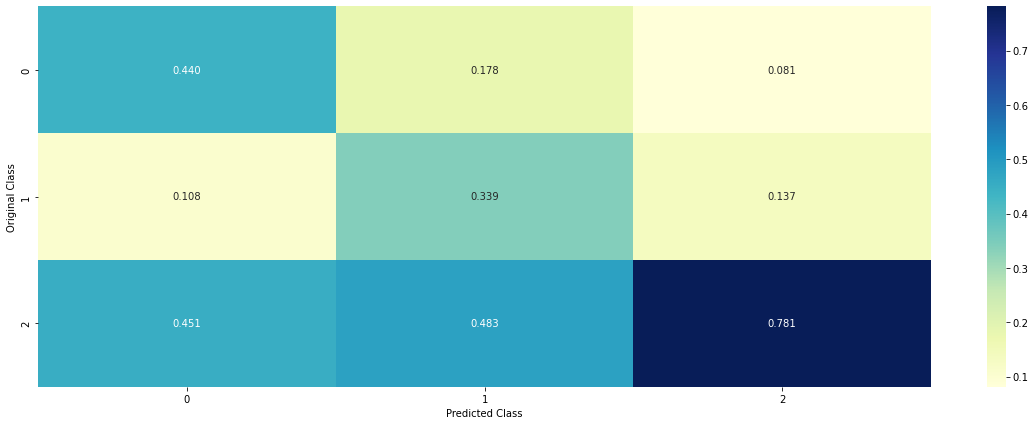

-------------------- Recall matrix (Row sum=1) --------------------


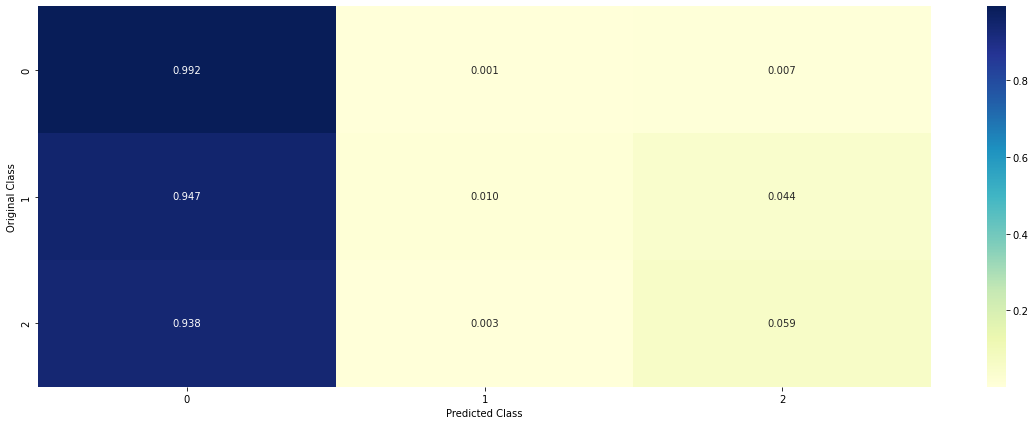

In [86]:

best_alpha = np.argmin(log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(final_4gram_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_4gram_train, Y_train)

predict_y = sig_clf.predict_proba(final_4gram_train)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_4gram_test)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

for n_estimators = 100 and max depth =  5
Log Loss : 0.5718993174712985
for n_estimators = 100 and max depth =  10
Log Loss : 0.5056859037468419
for n_estimators = 200 and max depth =  5
Log Loss : 0.5450085449977027
for n_estimators = 200 and max depth =  10
Log Loss : 0.4893501932011647
for n_estimators = 500 and max depth =  5
Log Loss : 0.5373866124375947
for n_estimators = 500 and max depth =  10
Log Loss : 0.48422194511940464
for n_estimators = 1000 and max depth =  5
Log Loss : 0.5292172523418535
for n_estimators = 1000 and max depth =  10
Log Loss : 0.47909378303280864
for n_estimators = 2000 and max depth =  5
Log Loss : 0.5259033934041993
for n_estimators = 2000 and max depth =  10
Log Loss : 0.4763438163308847


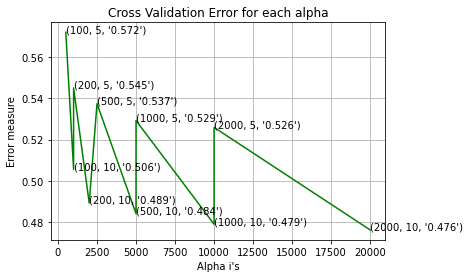

In [87]:


alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train_vector1, Y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train_vector1, Y_train)
        predict_y = sig_clf.predict_proba(X_test_vector1)
        log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(Y_test, predict_y)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


For values of best estimator =  2000 The train log loss is: 0.45646913505664966
For values of best estimator =  2000 The cross validation log loss is: 0.4763438163308972
Total number of data points : 37785
C (3, 3)
-------------------- Confusion matrix --------------------


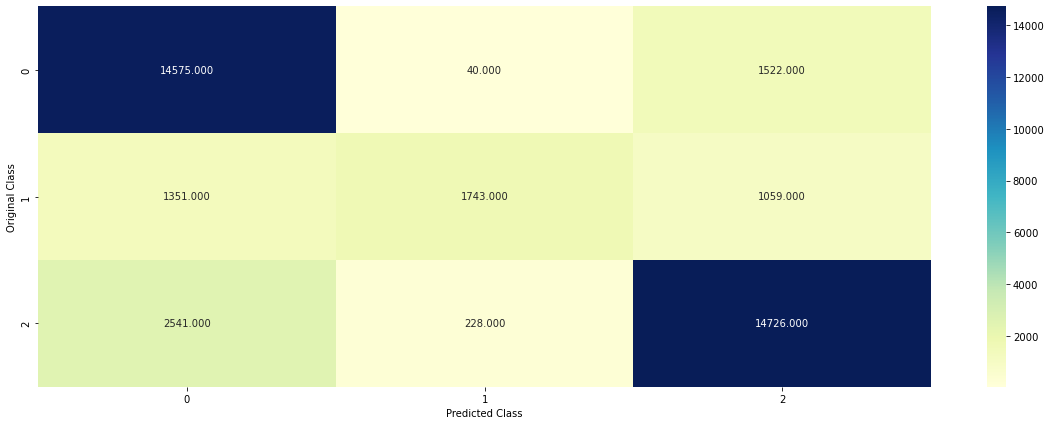

-------------------- Precision matrix (Columm Sum=1) --------------------


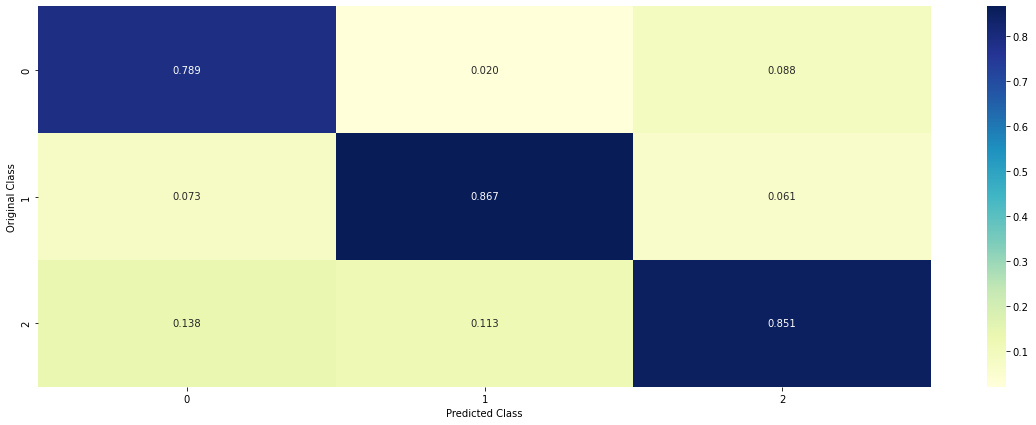

-------------------- Recall matrix (Row sum=1) --------------------


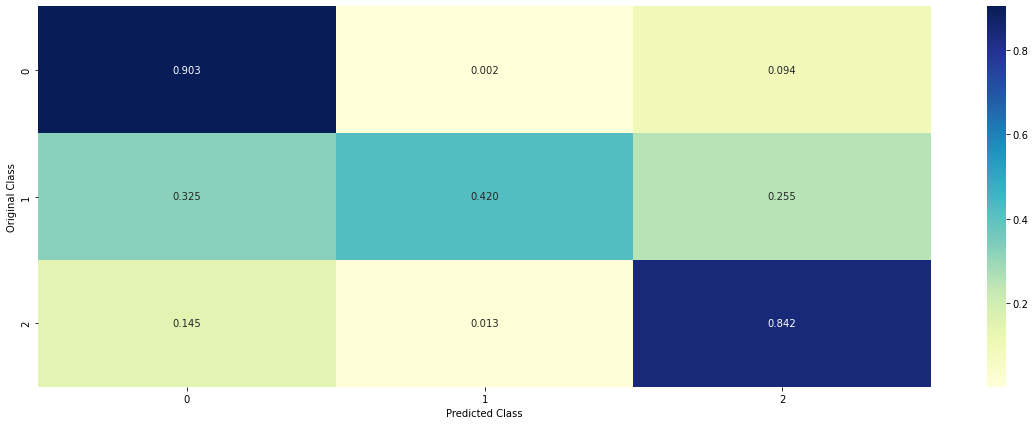

In [88]:

best_alpha = np.argmin(log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(X_train_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_vector1, Y_train)

predict_y = sig_clf.predict_proba(X_train_vector1)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_vector1)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

In [ ]:


alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(tfidf_sent_vectors, Y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(tfidf_sent_vectors, Y_train)
        predict_y = sig_clf.predict_proba(tfidf_sent_vectors_test)
        log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(Y_test, predict_y)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


for n_estimators = 100 and max depth =  5
Log Loss : 0.6607151587389087
for n_estimators = 100 and max depth =  10
Log Loss : 0.5661863463891621
for n_estimators = 200 and max depth =  5
Log Loss : 0.6589245449555007
for n_estimators = 200 and max depth =  10
Log Loss : 0.563472422227515
for n_estimators = 500 and max depth =  5
Log Loss : 0.6575143555920047
for n_estimators = 500 and max depth =  10
Log Loss : 0.5621056067763299
for n_estimators = 1000 and max depth =  5
Log Loss : 0.657947954473748
for n_estimators = 1000 and max depth =  10
Log Loss : 0.5616740646966893
for n_estimators = 2000 and max depth =  5
Log Loss : 0.6577432443807053
for n_estimators = 2000 and max depth =  10


In [ ]:

best_alpha = np.argmin(log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(X_traitfidf_sent_vectorsn_vector1, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tfidf_sent_vectors, Y_train)

predict_y = sig_clf.predict_proba(tfidf_sent_vectors)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(tfidf_sent_vectors_test)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

stacking

In [ ]:

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
bow_train
final_4gram_train
X_train_vector1
tfidf_sent_vectors

In [33]:
pip install xgboost==1.00.00

Note: you may need to restart the kernel to use updated packages.


XGBoost

In [53]:
pip install xgboost --upgrade

     |████████████████████████████████| 173.5 MB 8.6 kB/s              
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.0.0
    Uninstalling xgboost-1.0.0:
      Successfully uninstalled xgboost-1.0.0
Note: you may need to restart the kernel to use updated packages.


In [61]:
log_error_array = []
for i in range(10):
    lr = np.round(np.random.rand()/10,3)
    max_leaf = np.random.randint(30,100)
    minchild_weight  = np.random.randint(30,150)
    xgb = XGBClassifier(objective='multi:softmax', learning_rate = lr,min_child_weight = minchild_weight, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,
                       max_leaves = max_leaf, n_jobs=-1 )
    xgb.fit(bow_train,Y_train)
    #sig_clf=CalibratedClassifierCV(xgb,method='sigmoid')
    #sig_clf.fit(bow_train,Y_train)
    predict_y = xgb.predict_proba(bow_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=xgb.classes_, eps=1e-15))
    print("Log Loss :",log_loss(Y_test, predict_y),"lr:",lr,"max_leaf:",max_leaf,"minchild_weight:",minchild_weight) 


#print(f"learning rate: {lr}, min_child_weight: {minchild_weight},max_leaves: {max_leaf} and the logloss value is: {ll} ")
#print('*'*100)

Log Loss : 0.584858381111691 lr: 0.052 max_leaf: 67 minchild_weight: 137
Log Loss : 0.622039881865428 lr: 0.033 max_leaf: 72 minchild_weight: 80
Log Loss : 0.5815157954362824 lr: 0.054 max_leaf: 41 minchild_weight: 140
Log Loss : 0.5323458786247466 lr: 0.066 max_leaf: 93 minchild_weight: 87
Log Loss : 0.5096299211441755 lr: 0.069 max_leaf: 36 minchild_weight: 43
Log Loss : 0.5853732033662643 lr: 0.049 max_leaf: 60 minchild_weight: 117
Log Loss : 0.6013011546212964 lr: 0.045 max_leaf: 77 minchild_weight: 148
Log Loss : 0.5335645625541837 lr: 0.094 max_leaf: 96 minchild_weight: 128
Log Loss : 0.6835581712991657 lr: 0.022 max_leaf: 74 minchild_weight: 93
Log Loss : 0.5816959623902035 lr: 0.046 max_leaf: 75 minchild_weight: 91


The train log loss is: 0.5075672830089165
The test validation log loss is: 0.5096299211441755
C (3, 3)
-------------------- Confusion matrix --------------------


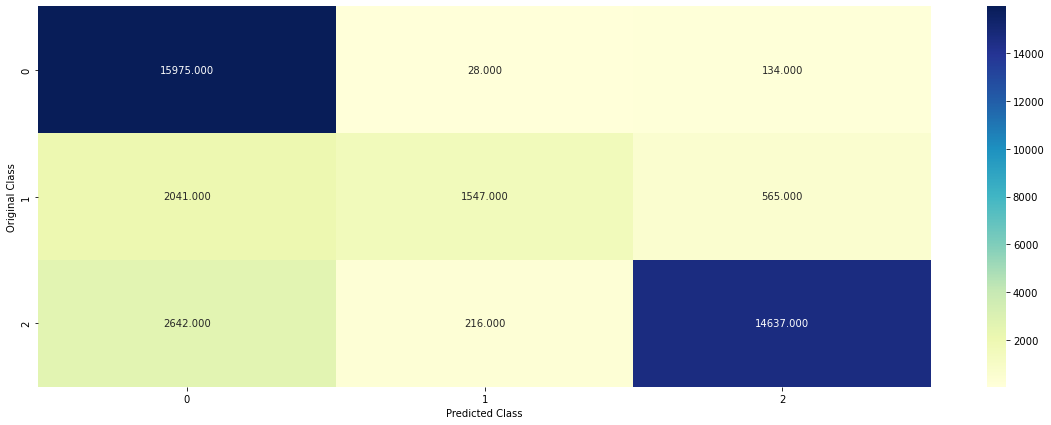

-------------------- Precision matrix (Columm Sum=1) --------------------


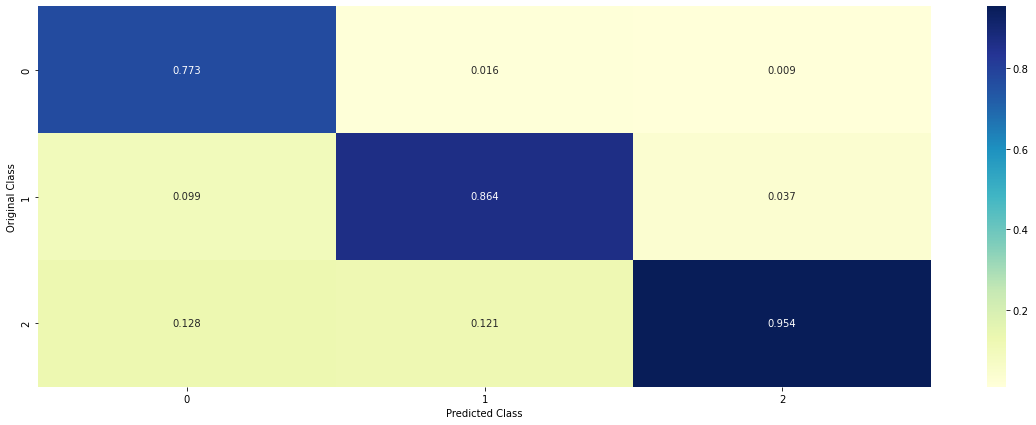

-------------------- Recall matrix (Row sum=1) --------------------


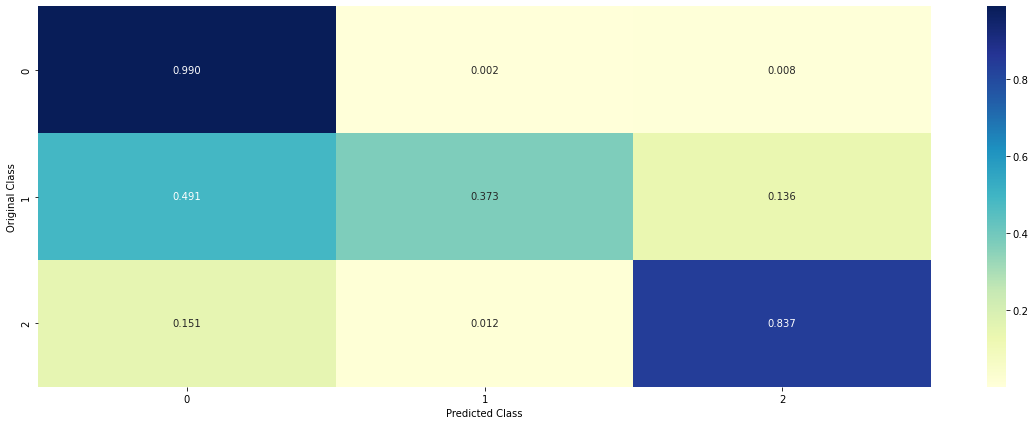

In [64]:

x_cfl=XGBClassifier(objective='multi:softmax', learning_rate = 0.069,min_child_weight = 43, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,
                       max_leaves = 36, n_jobs=-1)
x_cfl.fit(bow_train,Y_train)
#sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid") 
predict_y = x_cfl.predict_proba(bow_train)
print ( "The train log loss is:",log_loss(Y_train, predict_y))
predict_y = x_cfl.predict_proba(bow_test)
print("The test validation log loss is:",log_loss(Y_test, predict_y))
plot_confusion_matrix(Y_test, x_cfl.predict(bow_test))

In [ ]:

final_4gram_train
X_train_vector1
tfidf_sent_vectors

In [65]:
log_error_array = []
for i in range(10):
    lr = np.round(np.random.rand()/10,3)
    max_leaf = np.random.randint(30,100)
    minchild_weight  = np.random.randint(30,150)
    xgb = XGBClassifier(objective='multi:softmax', learning_rate = lr,min_child_weight = minchild_weight, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,
                       max_leaves = max_leaf, n_jobs=-1 )
    xgb.fit(final_4gram_train,Y_train)
    #sig_clf=CalibratedClassifierCV(xgb,method='sigmoid')
    #sig_clf.fit(bow_train,Y_train)
    predict_y = xgb.predict_proba(final_4gram_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=xgb.classes_, eps=1e-15))
    print("Log Loss :",log_loss(Y_test, predict_y),"lr:",lr,"max_leaf:",max_leaf,"minchild_weight:",minchild_weight) 


#print(f"learning rate: {lr}, min_child_weight: {minchild_weight},max_leaves: {max_leaf} and the logloss value is: {ll} ")
#print('*'*100)

Log Loss : 0.9863696733446006 lr: 0.023 max_leaf: 53 minchild_weight: 56
Log Loss : 1.00808022343972 lr: 0.007 max_leaf: 89 minchild_weight: 73
Log Loss : 1.0465942317631505 lr: 0.003 max_leaf: 33 minchild_weight: 78
Log Loss : 1.0848370427878264 lr: 0.086 max_leaf: 53 minchild_weight: 115
Log Loss : 1.0874032169428505 lr: 0.093 max_leaf: 97 minchild_weight: 63
Log Loss : 1.0103458001901564 lr: 0.042 max_leaf: 52 minchild_weight: 130
Log Loss : 1.0901855239520852 lr: 0.095 max_leaf: 65 minchild_weight: 54
Log Loss : 1.004389925579301 lr: 0.038 max_leaf: 86 minchild_weight: 59
Log Loss : 1.0084582762600207 lr: 0.007 max_leaf: 49 minchild_weight: 43
Log Loss : 0.9900500525127758 lr: 0.029 max_leaf: 59 minchild_weight: 98


In [ ]:

x_cfl=XGBClassifier(objective='multi:softmax', learning_rate = 0.069,min_child_weight = 43, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,
                       max_leaves = 36, n_jobs=-1)
x_cfl.fit(final_4gram_train,Y_train)
#sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid") 
predict_y = x_cfl.predict_proba(final_4gram_train)
print ( "The train log loss is:",log_loss(Y_train, predict_y))
predict_y = x_cfl.predict_proba(final_4gram_test)
print("The test validation log loss is:",log_loss(Y_test, predict_y))
plot_confusion_matrix(Y_test, x_cfl.predict(bow_test))

In [66]:
log_error_array = []
for i in range(10):
    lr = np.round(np.random.rand()/10,3)
    max_leaf = np.random.randint(30,100)
    minchild_weight  = np.random.randint(30,150)
    xgb = XGBClassifier(objective='multi:softmax', learning_rate = lr,min_child_weight = minchild_weight, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,
                       max_leaves = max_leaf, n_jobs=-1 )
    xgb.fit(X_train_vector1,Y_train)
    #sig_clf=CalibratedClassifierCV(xgb,method='sigmoid')
    #sig_clf.fit(bow_train,Y_train)
    predict_y = xgb.predict_proba(X_test_vector1)
    log_error_array.append(log_loss(Y_test, predict_y, labels=xgb.classes_, eps=1e-15))
    print("Log Loss :",log_loss(Y_test, predict_y),"lr:",lr,"max_leaf:",max_leaf,"minchild_weight:",minchild_weight) 


#print(f"learning rate: {lr}, min_child_weight: {minchild_weight},max_leaves: {max_leaf} and the logloss value is: {ll} ")
#print('*'*100)

Log Loss : 0.8155842875636127 lr: 0.01 max_leaf: 55 minchild_weight: 149
Log Loss : 0.6061241099632368 lr: 0.035 max_leaf: 66 minchild_weight: 73
Log Loss : 0.5327904582854796 lr: 0.097 max_leaf: 76 minchild_weight: 145
Log Loss : 0.5401359719480613 lr: 0.067 max_leaf: 62 minchild_weight: 114
Log Loss : 0.8284885649014138 lr: 0.009 max_leaf: 51 minchild_weight: 62
Log Loss : 0.5130684805404152 lr: 0.081 max_leaf: 70 minchild_weight: 104
Log Loss : 0.6970711492235673 lr: 0.02 max_leaf: 99 minchild_weight: 113
Log Loss : 0.5055311642268302 lr: 0.079 max_leaf: 47 minchild_weight: 90
Log Loss : 0.691241399330982 lr: 0.02 max_leaf: 71 minchild_weight: 68
Log Loss : 0.5343775265334337 lr: 0.09 max_leaf: 53 minchild_weight: 141


The train log loss is: 0.4803474317178473
The test validation log loss is: 0.48455993258378277
C (3, 3)
-------------------- Confusion matrix --------------------


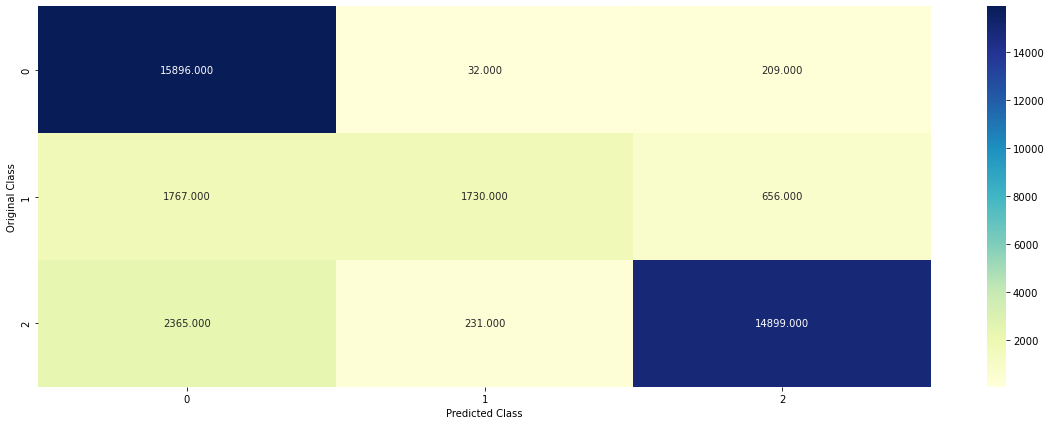

-------------------- Precision matrix (Columm Sum=1) --------------------


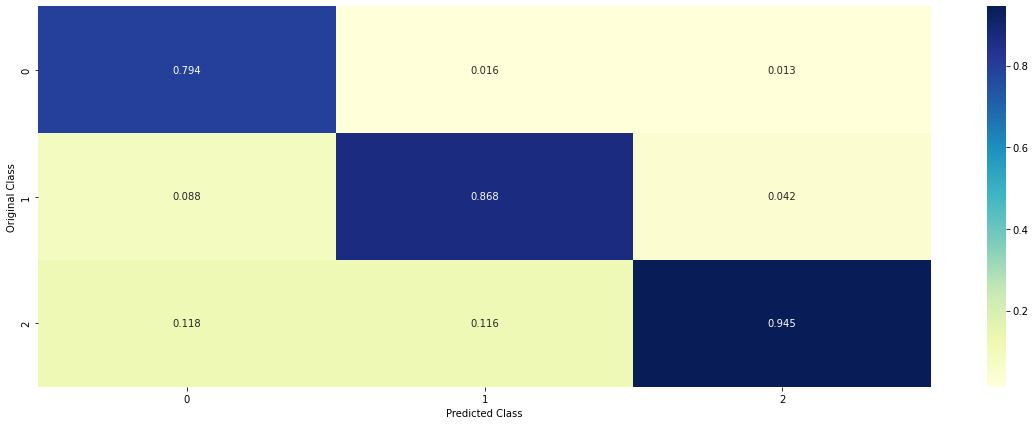

-------------------- Recall matrix (Row sum=1) --------------------


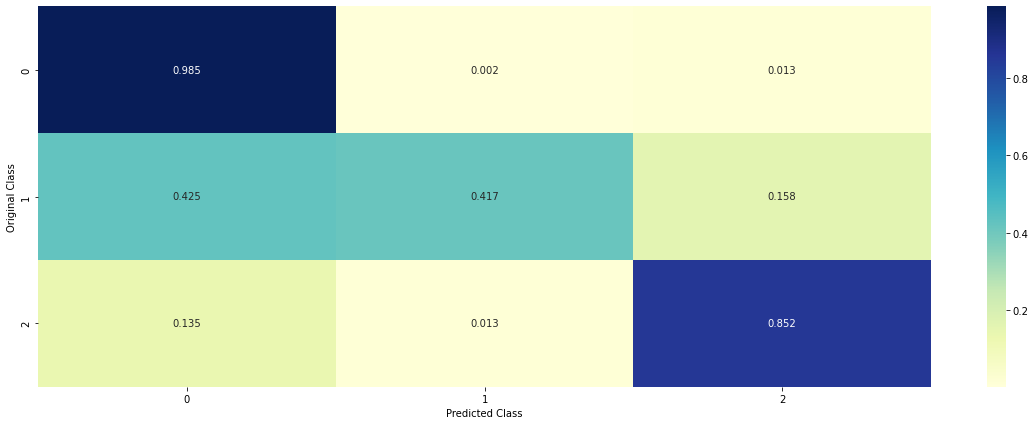

In [68]:

x_cfl=XGBClassifier(objective='multi:softmax', learning_rate = 0.079,min_child_weight = 47, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,
                       max_leaves = 90, n_jobs=-1)
x_cfl.fit(X_train_vector1,Y_train)
#sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid") 
predict_y = x_cfl.predict_proba(X_train_vector1)
print ( "The train log loss is:",log_loss(Y_train, predict_y))
predict_y = x_cfl.predict_proba(X_test_vector1)
print("The test validation log loss is:",log_loss(Y_test, predict_y))
plot_confusion_matrix(Y_test, x_cfl.predict(X_test_vector1))

In [69]:
log_error_array = []
for i in range(10):
    lr = np.round(np.random.rand()/10,3)
    max_leaf = np.random.randint(30,100)
    minchild_weight  = np.random.randint(30,150)
    xgb = XGBClassifier(objective='multi:softmax', learning_rate = lr,min_child_weight = minchild_weight, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,
                       max_leaves = max_leaf, n_jobs=-1 )
    xgb.fit(tfidf_sent_vectors,Y_train)
    #sig_clf=CalibratedClassifierCV(xgb,method='sigmoid')
    #sig_clf.fit(bow_train,Y_train)s
    predict_y = xgb.predict_proba(tfidf_sent_vectors_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=xgb.classes_, eps=1e-15))
    print("Log Loss :",log_loss(Y_test, predict_y),"lr:",lr,"max_leaf:",max_leaf,"minchild_weight:",minchild_weight) 


#print(f"learning rate: {lr}, min_child_weight: {minchild_weight},max_leaves: {max_leaf} and the logloss value is: {ll} ")
#print('*'*100)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:

x_cfl=XGBClassifier(objective='multi:softmax', learning_rate = 0.069,min_child_weight = 43, 
                       subsample = 0.7, colsample_bytree = 0.7, n_estimators = 100,
                       max_leaves = 36, n_jobs=-1)
x_cfl.fit(tfidf_sent_vectors,Y_train)
#sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid") 
predict_y = x_cfl.predict_proba(tfidf_sent_vectors)
print ( "The train log loss is:",log_loss(Y_train, predict_y))
predict_y = x_cfl.predict_proba(tfidf_sent_vectors_test)
print("The test validation log loss is:",log_loss(Y_test, predict_y))
plot_confusion_matrix(Y_test, x_cfl.predict(bow_test))

XgBoost Classification with best hyper parameters using RandomSearch ¶

In [ ]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1)
random_cfl1.fit(bow_train,Y_train)

In [ ]:
print (random_cfl1.best_params_)

In [ ]:

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

Maximum Voting classifier 

In [ ]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))